# **Financial Risk Exploratory Data Analysis**

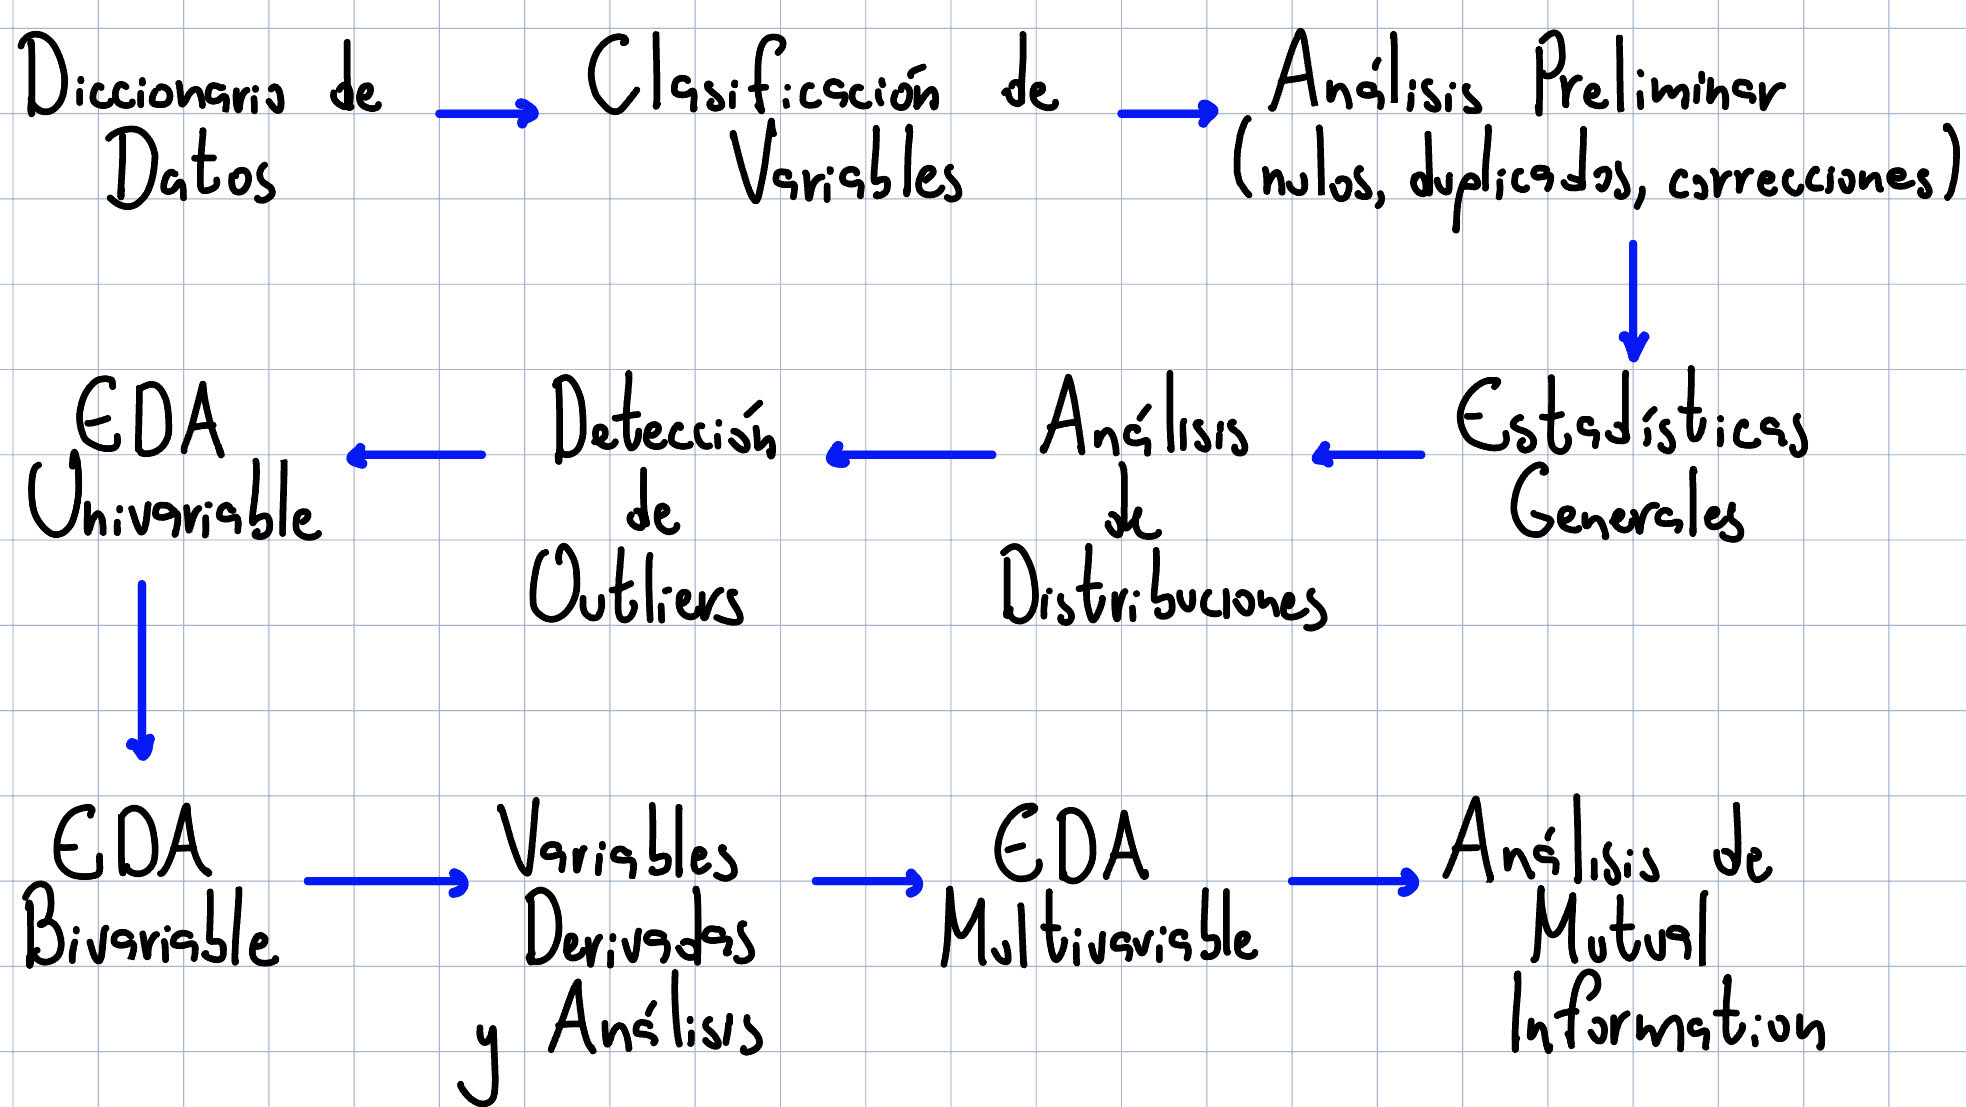

# **Data Dictionary**

- **1. tipo_credito:** Es una categorización interna representada por un número la cual indica el producto de c´redito otorgado al cliente.
- **2. fecha_prestamo:** Indica la fecha en la cuál se desembolsó el préstamo.
- **3. capital_prestado:** Es el monto de dinero en COP entregada al cliente en un crédito en específico.
- **4. plazo_meses:** Indica la duración del crédito en meses para amortizar el capital prestado.
- **5. edad_cliente:** Indica la edad bilógica (en años) de la persona que solicitó el crédito.
- **6. tipo_laboral:** Da muestra de la situación ocupacional del cliente, es decir, si es empleado o independiente.
- **7. salario_cliente:** Es el ingreso mensual en COP demostrado por el cliente al momento de pedir el préstamo.
- **8. total_otros_prestamos:** Significa las obligaciones de deuda financiera externas del cliente al momento de pedir un nuevo préstamo. 
- **9. cuota_pactada:** Valor mensual en COP que el cliente se compromete a pagar con e fin de amortizar el crédito.
- **10. puntaje:** Es un score interno de la entidad financiera con el cual califican al cliente.
- **11. puntaje_datacredito:** Es el puntaje de las centrales de riesgo con el cual claasifican a un cliente en función de su capacidad y responsabilidad de pago.
- **12. cant_creditosvigentes:** Número de obligaciones financieras que el cliente tiene abiertas y activas actualmente.
- **13. huella_consulta:** Esta variable se refiere a la cantidad de veces que otras entidades han consultado el perfil crediticio de un cliente en las centrasles de riesgo.
- **14. saldo_mora:** Es la suma de sinero que el cliente tiene actualmente vencida o sin pagar en el sistema financiero.
- **15. saldo_total:** Significa la deuda global (capital + intereses + cobros).
- **16. saldo_principal:** Es el capital que aún se debe a los bancos.
- **17. saldo_mora_codeudor:** Dinero vencido en créditos donde este cliente no es el titular principal, sino el fiador/codeudor.
- **18. creditos_sectorFinanciero:** Conteo o cantidad de créditos que el cliente tiene con el sistema financiero tradicional como bancos.
- **19. creditos_sectorCooperativo:** Conteo o cantidad de créditos que el cliente tiene con cooperativas o instituciones solidarias.
- **20. creditos_sectorReal:** Conteo o cantidad de créditos que el cliente tiene conel sector real, donde podemos encontrar retail, telefonía u otro tipo.
- **21. promedio_ingresos_datacredito:** Indica la estimación que hace Datacredito de los ingresos reales del cliente basados en movimiento u otros indicadores.
- **22. tendencia_ingresos:** Es el comportamiento de los ingresos estimados (Creciente, Decrecientes, Estables)
- **23. Pago_atiempo:** Indica si el cliente cumplió o no con sus obligaciones crediticias en este préstamo, se define como no haber alcanzado ciertos días de mora.

# **Clasificación de Variables**


# **1. Numéricas**


### **1.1. Discretas**

* edad_cliente
* plazo_meses
* total_otros_prestamos
* cant_creditosvigentes
* creditos_sectorFinanciero
* creditos_sectorCooperativo
* creditos_sectorReal
* huella_consulta

### **1.2. Continuas**

* capital_prestado
* salario_cliente
* cuota_pactada
* puntaje
* puntaje_datacredito
* saldo_mora
* saldo_total
* saldo_principal
* saldo_mora_codeudor
* promedio_ingresos_datacredito


# **2. Categóricas**


### **2.1. Politómicas**

* tipo_credito
* tendencia_ingresos

### **2.2. Dicotómicas**

* tipo_laboral
* pago_atiempo (**TARGET**)

# **3. Otras**

* **3.1. FECHA:** fecha_prestamo

In [ ]:
# Importación de Librerías

import os
from dotenv import load_dotenv
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
import scipy.stats as st
from sklearn.feature_selection import mutual_info_regression
import warnings

In [2]:
# Cargar Environment

pth = Path(os.getenv("DATA_FILE"))

# Cargar Data

df = pd.read_excel(pth / "BD_creditos.xlsx")

df.sample(10)

tipo_credito      fecha_prestamo  capital_prestado  plazo_meses  \
4843              4 2025-05-11 16:23:22         3760464.0           36   
7487              9 2025-10-31 10:59:48         6915150.0           10   
2709              4 2025-04-15 19:08:43         4240860.0           36   
6554              9 2025-04-30 12:49:37         1819243.2           10   
1391              4 2025-05-13 17:36:39         1991880.0           12   
10484             9 2025-05-08 15:51:19         5563780.8            9   
9055              4 2025-02-07 12:07:27         6048000.0            8   
3258              9 2025-05-26 09:12:02         2320274.4           10   
6462              9 2025-02-22 13:14:09         1958674.8            9   
1074              9 2025-07-25 12:33:16         2888496.0            9   

       edad_cliente   tipo_laboral  salario_cliente  total_otros_prestamos  \
4843             50       Empleado          1200000                 100000   
7487             34  Independiente          2750000                  78000   
2709             54       Empleado          2000000                 800000   
6554             51  Independiente          5200000                2000000   
1391             40       Empleado          2090000                 550000   
10484           122       Empleado        262744988                 114684   
9055             27  Independiente          8000000                      0   
3258             54       Empleado          4200000                2750000   
6462             53       Empleado          5000000                2500000   
1074             43       Empleado          2000000                1500000   

       cuota_pactada    puntaje  ...  saldo_mora  saldo_total  \
4843          126875  95.227787  ...         0.0       6728.0   
7487          606695  47.613894  ...         0.0      48119.0   
2709          137570  95.227787  ...         0.0      30175.0   
6554          154705  91.410695  ...         0.0     153538.0   
1391          157460  95.227787  ...         0.0      11161.0   
10484         519609  95.227787  ...         NaN          NaN   
9055          686528  95.227787  ...         0.0       7148.0   
3258          197518  95.227787  ...         0.0     156160.0   
6462          183098  95.227787  ...         0.0      62419.0   
1074          271312  95.227787  ...         0.0      32940.0   

       saldo_principal  saldo_mora_codeudor  creditos_sectorFinanciero  \
4843            6728.0                  0.0                          1   
7487              56.0                  0.0                          1   
2709           30175.0                  0.0                          1   
6554          153538.0                  0.0                          5   
1391           11161.0                  0.0                          2   
10484              NaN                  NaN                          0   
9055            7148.0                  0.0                          2   
3258          156160.0                  0.0                          4   
6462           62419.0                  0.0                          1   
1074           32940.0                  0.0                          3   

       creditos_sectorCooperativo  creditos_sectorReal  \
4843                            0                    2   
7487                            0                    0   
2709                            1                    2   
6554                            0                    0   
1391                            1                    0   
10484                           0                    0   
9055                            0                    0   
3258                            0                    0   
6462                            0                    0   
1074                            0                    1   

       promedio_ingresos_datacredito  tendencia_ingresos  Pago_atiempo  
4843                       1559587.0           Creciente             1  
7487             

# Datos Generales del Dataset

In [3]:
# Dataset Dimensiones

df.shape

(10763, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [5]:
# Cambio de tipo de dato a la variable objetivo

df['Pago_atiempo'] = df['Pago_atiempo'].astype('category')

In [6]:
# Cambio de tipo de dato de tipo credito a categoría

df['tipo_credito'] = df['tipo_credito'].astype('category')

In [7]:
# Ver las clases en columnas de tipo "object"

df["tipo_laboral"].unique()

array(['Empleado', 'Independiente'], dtype=object)

In [8]:
# Ver las clases en columnas de tipo "object"

df["tendencia_ingresos"].unique()

array(['Creciente', nan, 'Estable', 'Decreciente', 8315, 0, 158042, 3978,
       9147, 168750, -28589, 1000000, -566272, 24702, 31837, 122727,
       417087, 9090, 173031, -70715, -435177, -702927, -4105, 54683,
       22832, 209090, 5697, -288, -164315, 2029000, 17181, 15245, 82657,
       52862, 1817052, 75761, 146918, 1123000, 15090, 4250635, 22363,
       -101368, 86286, 65988, 77975, -224714, 10808], dtype=object)

# Corrreción de Valores

In [9]:
df['tendencia_ingresos'].unique()

array(['Creciente', nan, 'Estable', 'Decreciente', 8315, 0, 158042, 3978,
       9147, 168750, -28589, 1000000, -566272, 24702, 31837, 122727,
       417087, 9090, 173031, -70715, -435177, -702927, -4105, 54683,
       22832, 209090, 5697, -288, -164315, 2029000, 17181, 15245, 82657,
       52862, 1817052, 75761, 146918, 1123000, 15090, 4250635, 22363,
       -101368, 86286, 65988, 77975, -224714, 10808], dtype=object)

In [10]:
# Corrección de datos para la variable "tendencia_ingresos"

clases_validas = ['Creciente', 'Estable', 'Decreciente']

df['tendencia_ingresos'] = df['tendencia_ingresos'].apply(lambda x: x if x in clases_validas else np.nan)

In [11]:
df['tendencia_ingresos'].nunique()

3

# Conteo de Duplicados

In [12]:
# Verificación de registros duplicados

print(f"El dataset tiene {df.duplicated().sum()} duplicados")

El dataset tiene 0 duplicados


# Conteo de Nulos

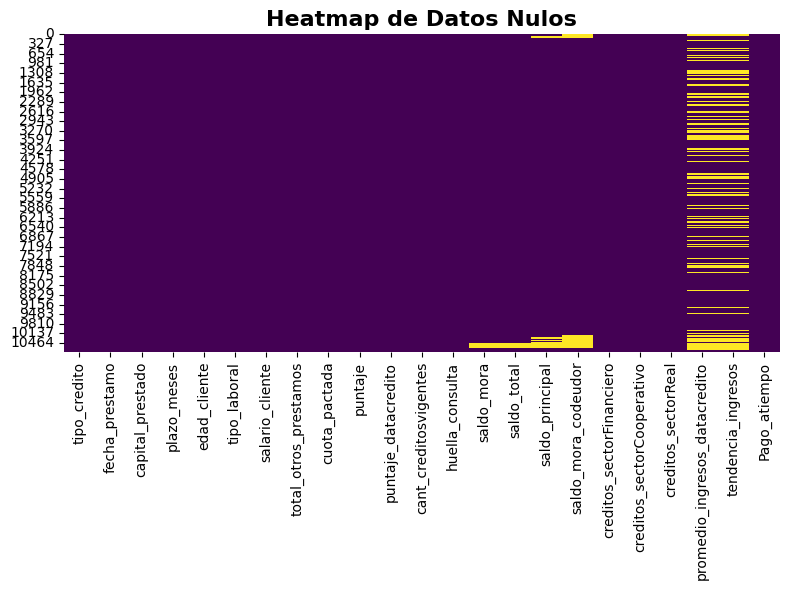

In [13]:
# Heatmap de Datos Nulos

plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Heatmap de Datos Nulos', fontsize = 16, fontweight = 'bold')
plt.tight_layout()

plt.show()

In [14]:
print(df.isnull().sum().sort_values(ascending = False))

tendencia_ingresos               2990
promedio_ingresos_datacredito    2930
saldo_mora_codeudor               590
saldo_principal                   405
saldo_mora                        156
saldo_total                       156
puntaje_datacredito                 6
salario_cliente                     0
tipo_laboral                        0
edad_cliente                        0
plazo_meses                         0
capital_prestado                    0
fecha_prestamo                      0
tipo_credito                        0
total_otros_prestamos               0
cant_creditosvigentes               0
huella_consulta                     0
cuota_pactada                       0
puntaje                             0
creditos_sectorCooperativo          0
creditos_sectorFinanciero           0
creditos_sectorReal                 0
Pago_atiempo                        0
dtype: int64


In [15]:
# Porcentaje de nulos por columnas

for col in df.columns:

    print("El porcentaje de nulos en la columna ", col, "es: ", round(df[col].isnull().mean() * 100, 2), "%")

El porcentaje de nulos en la columna  tipo_credito es:  0.0 %
El porcentaje de nulos en la columna  fecha_prestamo es:  0.0 %
El porcentaje de nulos en la columna  capital_prestado es:  0.0 %
El porcentaje de nulos en la columna  plazo_meses es:  0.0 %
El porcentaje de nulos en la columna  edad_cliente es:  0.0 %
El porcentaje de nulos en la columna  tipo_laboral es:  0.0 %
El porcentaje de nulos en la columna  salario_cliente es:  0.0 %
El porcentaje de nulos en la columna  total_otros_prestamos es:  0.0 %
El porcentaje de nulos en la columna  cuota_pactada es:  0.0 %
El porcentaje de nulos en la columna  puntaje es:  0.0 %
El porcentaje de nulos en la columna  puntaje_datacredito es:  0.06 %
El porcentaje de nulos en la columna  cant_creditosvigentes es:  0.0 %
El porcentaje de nulos en la columna  huella_consulta es:  0.0 %
El porcentaje de nulos en la columna  saldo_mora es:  1.45 %
El porcentaje de nulos en la columna  saldo_total es:  1.45 %
El porcentaje de nulos en la columna  

# Estadísticas Generales

In [16]:
# Descripción de variables numéricas

# Cuadro con todas las variables numericas --> media, mediana, moda, varianza, desviación estándar, mínimo, máximo, cuartiles, IQR

col_nums = df.select_dtypes(['int64', 'float64']).columns

var_num_estadisticas_pd = pd.DataFrame({
    'Media': df[col_nums].mean(),
    'Mediana': df[col_nums].median(),
    'Moda': df[col_nums].mode().iloc[0],
    'Varianza': df[col_nums].var(),
    'Desviación Estándar': df[col_nums].std(),
    'Mínimo': df[col_nums].min(),
    'Máximo': df[col_nums].max(),
    'Q1': df[col_nums].quantile(0.25),
    'Q2': df[col_nums].quantile(0.5),
    'Q3': df[col_nums].quantile(0.75),
    'IQR': df[col_nums].quantile(0.75) - df[col_nums].quantile(0.25)
})

var_num_estadisticas_pd

Media       Mediana          Moda  \
capital_prestado               2.434315e+06  1.921920e+06  1.200000e+06   
plazo_meses                    1.057558e+01  1.000000e+01  6.000000e+00   
edad_cliente                   4.394862e+01  4.200000e+01  4.000000e+01   
salario_cliente                1.721643e+07  3.000000e+06  3.000000e+06   
total_otros_prestamos          6.238870e+06  1.000000e+06  2.000000e+06   
cuota_pactada                  2.436174e+05  1.828630e+05  2.059900e+05   
puntaje                        9.117004e+01  9.522779e+01  9.522779e+01   
puntaje_datacredito            7.807908e+02  7.910000e+02  0.000000e+00   
cant_creditosvigentes          5.726749e+00  5.000000e+00  4.000000e+00   
huella_consulta                4.228561e+00  4.000000e+00  2.000000e+00   
saldo_mora                     7.746017e+00  0.000000e+00  0.000000e+00   
saldo_total                    4.593741e+04  1.617800e+04  0.000000e+00   
saldo_principal                4.034617e+04  1.444250e+04  0.000000e+00   
saldo_mora_codeudor            2.600020e-01  0.000000e+00  0.000000e+00   
creditos_sectorFinanciero      2.779987e+00  2.000000e+00  1.000000e+00   
creditos_sectorCooperativo     2.698132e-01  0.000000e+00  0.000000e+00   
creditos_sectorReal            1.302704e+00  1.000000e+00  0.000000e+00   
promedio_ingresos_datacredito  2.005157e+06  1.204496e+06  9.085260e+05   

                                   Varianza  Desviación Estándar  \
capital_prestado               3.646735e+12         1.909643e+06   
plazo_meses                    4.398451e+01         6.632082e+00   
edad_cliente                   2.268300e+02         1.506088e+01   
salario_cliente                1.263637e+17         3.554767e+08   
total_otros_prestamos          1.402290e+16         1.184183e+08   
cuota_pactada                  4.430760e+10         2.104937e+05   
puntaje                        2.711108e+02         1.646544e+01   
puntaje_datacredito            1.099940e+04         1.048780e+02   
cant_creditosvigentes          1.581782e+01         3.977162e+00   
huella_consulta                9.392282e+00         3.064683e+00   
saldo_mora                     5.105572e+04         2.259551e+02   
saldo_total                    1.129327e+10         1.062698e+05   
saldo_principal                5.075485e+09         7.124244e+04   
saldo_mora_codeudor            4.740599e+02         2.177292e+01   
creditos_sectorFinanciero      7.555938e+00         2.748807e+00   
creditos_sectorCooperativo     5.133305e-01         7.164708e-01   
creditos_sectorReal            3.328544e+00         1.824430e+00   
promedio_ingresos_datacredito  4.597234e+12         2.144116e+06   

                                     Mínimo        Máximo            Q1  \
capital_prestado               360000.00000  4.144415e+07  1.224831e+06   
plazo_meses                         2.00000  9.000000e+01  6.000000e+00   
edad_cliente                       19.00000  1.230000e+02  3.300000e+01   
salario_cliente                     0.00000  2.200000e+10  2.000000e+06   
total_otros_prestamos               0.00000  6.787675e+09  5.000000e+05   
cuota_pactada                   23944.00000  3.816752e+06  1.210415e+05   
puntaje                           -38.00999  9.522779e+01  9.522779e+01   
puntaje_datacredito                -7.00000  9.990000e+02  7.570000e+02   
cant_creditosvigentes               0.00000  6.200000e+01  3.000000e+00   
huella_consulta                     0.00000  2.900000e+01  2.000000e+00   
saldo_mora                          0.00000  1.253400e+04  0.000000e+00   
saldo_total                         0.00000  5.116066e+06  2.898000e+03   
saldo_principal                     0.00000  1.562285e+06  2.690000e+03   
saldo_mora_codeudor                 0.00000  2.145000e+03  0.000000e+00   
creditos_sectorFinanciero           0.00000  5.100000e+01  1.000000e+00   
creditos_sectorCooperativo          0.00000  1.300000e+01  0.000000e+00   
creditos_sectorReal                 0.00000 

# Anotaciones Básicas sobre las Estadística Generales

* **capital_prestado** tiene créditos de bajo importe donde el 75% de los datos están de $3.1 M hace abajo. Aunque la variabilidad de los datos es alta dada du desviación estandar de $1.9 M.
* **edad_cliente** tiene valores normales o estándares de población, sim embargo, el valor máximo es completamente dsfasado.
* **salario_cliente** presenta en gran mayoría valores bajos sin embargo la media y la desviación estándar se ven fuertemente afectados por los valores del percentil 75 en adelante. 
* **total_otros_prestamos** también presenta un sesgo fuerte por los valores del percentil 75 en adelante, ya que el 75% de los datos están en valores pequeños.
* **puntaje** en gran medida presenta valores muy similares, con baja desviación estándar sin embargo es una métrica interna.
* **puntaje_datacredito** también presenta en su mayoría valores entre 750 y 900.
* **cant_creditosvigentes**, la mayoria de valores están rangos considerables para la variable, el valor máximo resulta impensable inicialmente.
* **plazo_meses**, se concluye que el 75% del plazo de los créditos está entre 2 meses y 1 año, el 15% restante está entre 1 año y 7.5 años. Son plazos relativamente cortos y montos bajos y muy concretos. 
* **huella_consulta**, los perfiles crediticios no son tan visitados por otras instituciones, el 75% recibe 6 o menos consultas en un tiempo determiando.
* **saldo_mora**, a nivel de valores, no nos aporta muchas información ya que como la mayoría de valores de la variable objetivo son 1 (si se pago) esto repercute en esta variable, ya que si se registra como pago a timepo, es porque no hay mora.
* **saldo_principal**, son valores pequeños acotados por un máximo de COP $1.5 M.
* Las variables **creditos_sectorFinanciero**,  **creditos_sectorCooperativo** y **creditos_sectorReal** presentan "similares" respetando su naturaleza. Por la cultura, tienden a ser pequeños valores. No obstante, hay valores muy grandes, que seguramente son pocos registros. 
* **promedio_ingresos_datacredito**, si bien es un promedio y esta medida afecta la interpretación debido a la heterogeneidad de los valores, estos son más bajos que la otra variable que mide ingresos (salario_cliente).



In [17]:
# Kurtosis y Skew 

# Columnas numpericas

col_nums = df.select_dtypes(['int64', 'float64']).columns

resultados = []

for col in col_nums:

    kurt = kurtosis(df[col].dropna())
    skew_val = skew(df[col].dropna())
    
    resultados.append({
        'Columna': col,
        'Kurtosis': kurt,
        'Skew-Sesgo': skew_val
    })

kurtosis_skew = pd.DataFrame(resultados)

# Mostrar resultados

kurtosis_skew

Columna     Kurtosis  Skew-Sesgo
0                capital_prestado    35.301130    3.723365
1                     plazo_meses     7.775949    2.459348
2                    edad_cliente     7.864723    1.934129
3                 salario_cliente  2210.202459   43.770563
4           total_otros_prestamos  1718.481718   38.458525
5                   cuota_pactada    26.637820    3.792772
6                         puntaje    24.069268   -4.864929
7             puntaje_datacredito    39.418912   -5.643726
8           cant_creditosvigentes     8.618783    1.797487
9                 huella_consulta     3.996569    1.486895
10                     saldo_mora  1844.842312   40.562746
11                    saldo_total   788.794183   20.194818
12                saldo_principal    51.038614    5.049440
13            saldo_mora_codeudor  9275.263891   94.957500
14      creditos_sectorFinanciero    19.432183    2.702694
15     creditos_sectorCooperativo    29.337264    4.218079
16            creditos_sectorReal    18.178203    3.164425
17  promedio_ingresos_datacredito    32.749068    4.279331

# Anotaciones sobre Kurtosis y Skewness

El skewness o la asimetría dice hacia donde están la cola de los datos. La curtosis dice qué tan pesada o afiladas son las colas.

##### *Kurtosis > 3* indica presencia de valores atípicos y extremos en los datos.

##### *Skew-Sesgo-Asimetría > 1* indica muchos valores bajos y pocos valores altos --> Cola estirada hacia la derecha.

##### *Skew-Sesgo-Asimetría < 1* indica muchos valores altos y pocos valores bajos --> Cola estirada hacia la izquierda.

##### *Skew-Sesgo-Asimetría = 0* indica una distribución normal.

* A nivel general se puede detectar que los datos no siguen una Distibución Normal, porque contiene valores extremos y atípicos.
* Respecto a las variables **salario_cliente**, **total_otros_prestamos**, **saldo_mora**, **saldo_mora_codeudor** son las variables con los sesgos más grandes. Podemos resumir que la gran mayoría (más del 95%) de los datos presentan valores normales o regulares, pero hay unos pocos registros con cifras gigantes. Las personas más ricas del país están pidiendo los préstamos y productos crediticios que piden las personas comunes.
* Las variables que tienen sesgo negativo son **puntaje** y **puntaje_datacredito**, esto es el reflejo del sistema financiero. Significa que la inmensa mayoría de las personas tienen puntajes buenos/altos (la masa de datos está a la derecha). Sin embargo, hay una cola de personas con puntajes desastrosamente bajos. Es lógico, porque si yodos los puntajes fueran bajos nadie prestaría dinero y la entidad quiebra.
* Por el lado de las variables levemente asimétricas, están **capital_prestado**, **plazo_meses** y **cuota_pactada** que se deriva en parte del capital prestado. La gran mayoría de clientes estan con montos pequeños y de no mucho tiempo, pero hay pocos valofres de montos gigantes y de mucho plazo.
* Y en medio de esto, están las otra variables, que tienen sesgos positivos y no tan equlibrados. Es decir, muchos valores en un lado (normalidad) y otros pocos en el extremo (atípicos).


# Variable Objetivo

<Axes: xlabel='Pago_atiempo'>

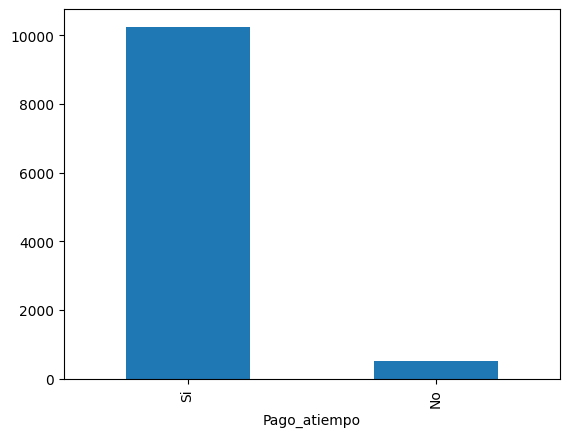

In [18]:
# Conteo de clases para la variable objetivo

df['Pago_atiempo'] = df['Pago_atiempo'].cat.rename_categories({0: "No", 1: "Si"})

df['Pago_atiempo'].value_counts().plot(kind = "bar")

# Cambio de Tipo de Dato

In [19]:
# Rectificar el Cambio de tipo de data (object --> category)

for col in df.columns:

    if df[col].dtype == 'object':

        df[col] = df[col].astype('category')

# Test de Kolmogorov-Smirnov

In [ ]:
# Conocer la distribución de las variables numéricas

warnings.filterwarnings("ignore", category = RuntimeWarning)

distributions = [st.norm, st.expon, st.gamma, st.lognorm]

for dist in distributions:

    for col in col_nums:
    
        params = dist.fit(df[col].dropna())
        ks_stat, p_value = st.kstest(df[col].dropna(), dist.name, args = params)
        
        print(f"{dist.name} - {col} - p-value: {p_value}")

norm - capital_prestado - p-value: 1.5228745436836422e-189
norm - plazo_meses - p-value: 0.0
norm - edad_cliente - p-value: 1.421810346120418e-57
norm - salario_cliente - p-value: 0.0
norm - total_otros_prestamos - p-value: 0.0
norm - cuota_pactada - p-value: 3.076450025227183e-275
norm - puntaje - p-value: 0.0
norm - puntaje_datacredito - p-value: 0.0
norm - cant_creditosvigentes - p-value: 8.322673987404575e-158
norm - huella_consulta - p-value: 3.4468324389484335e-233
norm - saldo_mora - p-value: 0.0
norm - saldo_total - p-value: 0.0
norm - saldo_principal - p-value: 0.0
norm - saldo_mora_codeudor - p-value: 0.0
norm - creditos_sectorFinanciero - p-value: 3.797369643716601e-278
norm - creditos_sectorCooperativo - p-value: 0.0
norm - creditos_sectorReal - p-value: 0.0
norm - promedio_ingresos_datacredito - p-value: 0.0
expon - capital_prestado - p-value: 9.14563667245312e-109
expon - plazo_meses - p-value: 0.0
expon - edad_cliente - p-value: 0.0
expon - salario_cliente - p-value: 0.0

# Anotaciones sobre las Distribuciones

El test K-S es una prueba donde se compara la distribución de los datos con uan distribución teórica perfecta (Normal, Exponencial, Log-Normal, ...)

Se superpone la curva acumulada de los datos con la curva de la distribución teórica y se mide la distancia (el estadístico D) entre ambas. Si la distancia es muy grande, los datos no siguen esa distribución.

El p-value es una medida de probabilidad. 

- Hipótesis Nula (H0): Los datos siguen pefectamente la distribiución teórica.

##### *p-value < 0.05* se rechaza H0, por lo que los datos no siguen la distrbución teórica.

##### *p-value > 0.05* no se rechaza H0 (tampoco de acepta). No se detectaron diferencias significativas.


* Prueba Normal: Todos los valores p son 0.0 aproximadamente, or lo que ninguna variable se distribuye normalmente, se confirma el análisis de curtosis y sesgos.
* Prueba Exponencial y Gamma: Todos los p-values son 0.0 aproximado. Tampoco de ajusta a estas distribuciones. 
* Prueba Log-Normal: También casi todos los p-values son 0.0. Las variables **capital_prestado: 0.0119** y **cuota_pactada: 0.0098** no cumplen con el test, con p-values cercanos al 1% (dejando de ser cuadriculados) podemos entrar a considerar que podrían seguir una distribucón log-normal.

* Para concluir, los datos son altamente asimétricos y presentan colas pesadas.

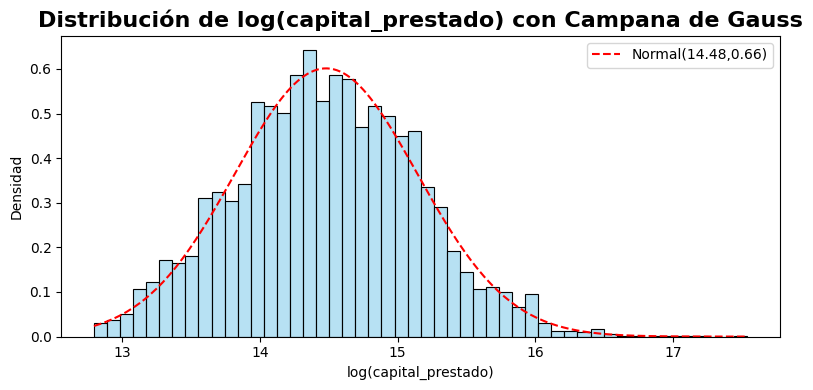

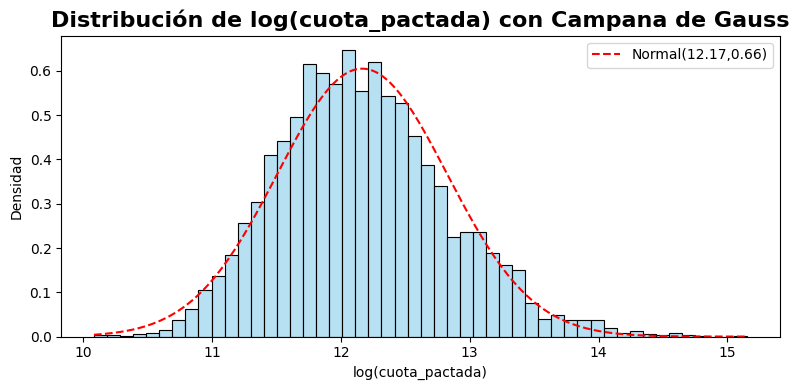

In [21]:
# Posibles variables que sigan una distribución log-normal

# Variables numéricas a evaluar

cols = ['capital_prestado', 'cuota_pactada']

# Transformación logarítmica de las variables y comparación con la distribución normal

for col in cols:

    data = np.log(df[col].dropna())

    mu, sigma = data.mean(), data.std()

    plt.figure(figsize = (8, 4))

    # Histograma

    sns.histplot(data, bins = 50, stat = 'density',
                 edgecolor = 'black', color = 'skyblue', alpha = 0.6)

    # Distribución normal

    x = np.linspace(data.min(), data.max(), 200)

    plt.plot(x, st.norm.pdf(x, mu, sigma), 'r--',
             label = f'Normal({mu:.2f},{sigma:.2f})')

    plt.title(f'Distribución de log({col}) con Campana de Gauss', fontsize = 16, fontweight = 'bold')
    plt.xlabel(f'log({col})')
    plt.ylabel('Densidad')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Detección de Outliers

En la variable "**edad_cliente**" tenemos 150 registros con edades superiores a 90. A pesar  que los 90 pueden ser una edad factible de bancarización, al hacer una búsqueda con un rango de edad superior a 100, se evidencias 150 registros, lo cual es impráctico e inverosimil para este caso.

In [22]:
# Valores con atípicos: personas mayores a 90 años --> np.nan

df.loc[df['edad_cliente'] > 90, 'edad_cliente'] = np.nan

print(df['edad_cliente'].max())

69.0


En la columna "**total_otros_prestamos**", al revisar los individuos en los percentiles superiores observamos que existe una correspondencia entre un valor alto en esta columna junto con el salario_cliente (13 registros). Existe un caso, donde el valor de otros prestamos es de COP $1.500.000.000  y el salario del cliente es de COP $3.000.000, además el promedio_ingresos_datacredito es de COP $1.500.000. No es viable que una entidad financiera le otorgue un crédito a este individuo teniendo en cuenta esta características, esto indica un nivel de riesgo alto ya que esta persona debe 500 veces su ingreso mensual.

In [23]:
# Buscando valores atípicos

# print(df['total_otros_prestamos'].quantile(1)) 

# Ver solo los registros con valores mayores a 100000000 en la columna "total_otros_prestamos"

# Poner null en "total_otros_prestamos" para el registro con valor de COP $1500000000

df.loc[df['total_otros_prestamos'] == 1500000000, 'total_otros_prestamos'] = np.nan

Respecto a la variable "**cant_creditosvigentes**", como se evidencia en el boxplot, la mayoría de valores se encuentran concentrados entre 0 y 10. No obstante, resulta curioso tachar de outliers los datos por fuera de los bigotes, que son numerosos y pueden ser factibles (no imposibles) en el entorno.

In [24]:
# Revisar datos superiores al percentil 99 de la columna "cant_creditosvigentes"

cant_creditos_top_1 = []

for i in df['cant_creditosvigentes']:

    if i > df['cant_creditosvigentes'].quantile(0.99):

        cant_creditos_top_1.append(i)

print(len(cant_creditos_top_1))

99


La situación con las variables "**creditos_sectorCooperativo**", "**creditos_sectorReal**" presenta la misma naturaleza de la variable anteriormente analizada.

Sigamos con la variable "**creditos_sectorFinanciero**" presenta un comportamiento similar a las columnas anteriores, con valores altos pero posibles. Al revisar los individuos con maypr cantidad de creditos en el sector financiero, se observa que el valor que se debe no supera las 10-15 veces su salario, por lo que no se podría considerar como outliers a pesar de estar por fuera del percentil 99.5.

In [25]:
# Conocer los regsitros por fuera del percentil 99 en la columna "creditos_sectorFinanciero"

df.loc[df['creditos_sectorFinanciero'] > df['creditos_sectorFinanciero'].quantile(0.995)].head(15).sort_values(by = 'creditos_sectorFinanciero', ascending = False)

tipo_credito      fecha_prestamo  capital_prestado  plazo_meses  \
3144            4 2025-05-10 10:33:09         2239966.8           12   
2464            4 2025-05-05 09:59:22         1080000.0            6   
865             9 2025-03-15 17:47:54         1414458.0           10   
3151            9 2025-05-15 11:21:29         3169874.4            9   
1905            4 2025-03-25 18:00:45         5775240.0            6   
914             9 2025-09-24 10:35:21         4561597.2           10   
3112            4 2025-01-15 10:49:08         1823880.0           12   
596             4 2025-06-02 10:06:13         2616000.0            6   
2245            9 2025-07-05 18:17:59         3940480.8            9   
627             4 2025-03-03 12:00:30         2138400.0           12   
233             4 2025-05-11 18:08:25         1613880.0            6   
743             4 2025-02-15 13:11:48         2645760.0           12   
426             9 2025-05-25 11:29:30         6333012.0           10   
1944            4 2025-07-01 12:48:20         4200000.0            6   
1267            4 2025-01-10 13:39:12         1199880.0           12   

      edad_cliente   tipo_laboral  salario_cliente  total_otros_prestamos  \
3144          37.0       Empleado          1600000               500000.0   
2464          62.0       Empleado          4760000              1500000.0   
865           49.0  Independiente          7000000              2000000.0   
3151          43.0       Empleado         12115000              6000000.0   
1905          56.0       Empleado          8000000              2000000.0   
914           44.0  Independiente         20090000            206629000.0   
3112          43.0       Empleado          6000000               800000.0   
596           59.0       Empleado         15000000              8000000.0   
2245          54.0  Independiente          7000000              2500000.0   
627           38.0  Independiente         32000000             15000000.0   
233           43.0  Independiente          7000000              3500000.0   
743           54.0       Empleado          3000000              2000000.0   
426           38.0       Empleado         44707750              8000000.0   
1944          59.0  Independiente          5000000                    0.0   
1267          60.0       Empleado          2000000               600000.0   

      cuota_pactada    puntaje  ...  saldo_mora  saldo_total  saldo_principal  \
3144         178684  95.227787  ...         0.0      33908.0          33908.0   
2464         161759  95.227787  ...         0.0      48851.0          48851.0   
865          120094  95.227787  ...         0.0      48267.0          46255.0   
3151         296748  95.227787  ...         0.0     152026.0         152026.0   
1905         858322  95.227787  ...         0.0     166167.0         166167.0   
914          392396  95.227787  ...         0.0    1151492.0         851139.0   
3112         126658  44.352716  ...         0.0      58215.0          58215.0   
596          390480  95.227787  ...         0.0     348056.0         298031.0   
2245         369417  95.227787  ...         0.0     208441.0         185539.0   
627          168002  95.227787  ...         0.0     472377.0         472377.0   
233          240520  95.227787  ...         0.0     607322.0         607322.0   
743          207604  95.227787  ...         0.0     427228.0         328341.0   
426          539112  95.227787  ...         0.0     923880.0         545712.0   
1944         626951  95.227787  ...         0.0      65114.0           6172.0   
1267          83325  95.227787  ...         0.0     259995.0         259995.0   

      saldo_mora_codeudor  creditos_sectorFinanciero  \
3144                  0.0                         32   
2464                  0.0                         28   
865                   0.0                         27   
3151                  0.0                         27   
1905                  0.0                 

Se sabe que el "**puntaje_datacredito**" va desde los 150 hasta 950. Por lo tanto, los valores menores a 150 y mayores a 950 serán tomados como nulos. Esta es una regla establecida por la Ley 1266 de 2008 (Habeas Data), donde se establece que las personas deben tener acceso actualizdo y directo a su puntaje.

In [26]:
# Nulos para los valores de datacredito menores de 150 y mayores a 950


df.loc[(df['puntaje_datacredito'] < 150) |  (df['puntaje_datacredito'] > 950), 'puntaje_datacredito'] = np.nan

df['puntaje_datacredito'].describe()

count    10604.000000
mean       791.504621
std         50.693172
min        287.000000
25%        758.000000
50%        792.000000
75%        826.000000
max        947.000000
Name: puntaje_datacredito, dtype: float64

A modo de conclusión, no solo para estas variables sino apoyándonos en los conceptos previos y pruebas estadísticas hechas anteriormente, no es factible eliminar y poner en Null los registros que se salgan del IQR o de una distribución teórica o que se entrada se vean muy raros. Como se confirmó, los datos tienen colas pesadas y afectan las distribuciones de las variables. Si bien, hay cosas que se pueden detectar rápidamente como Edad > 100 o un sueldo negativo, no todo es error de digitación.

# EDA Univariable (Numéricas)

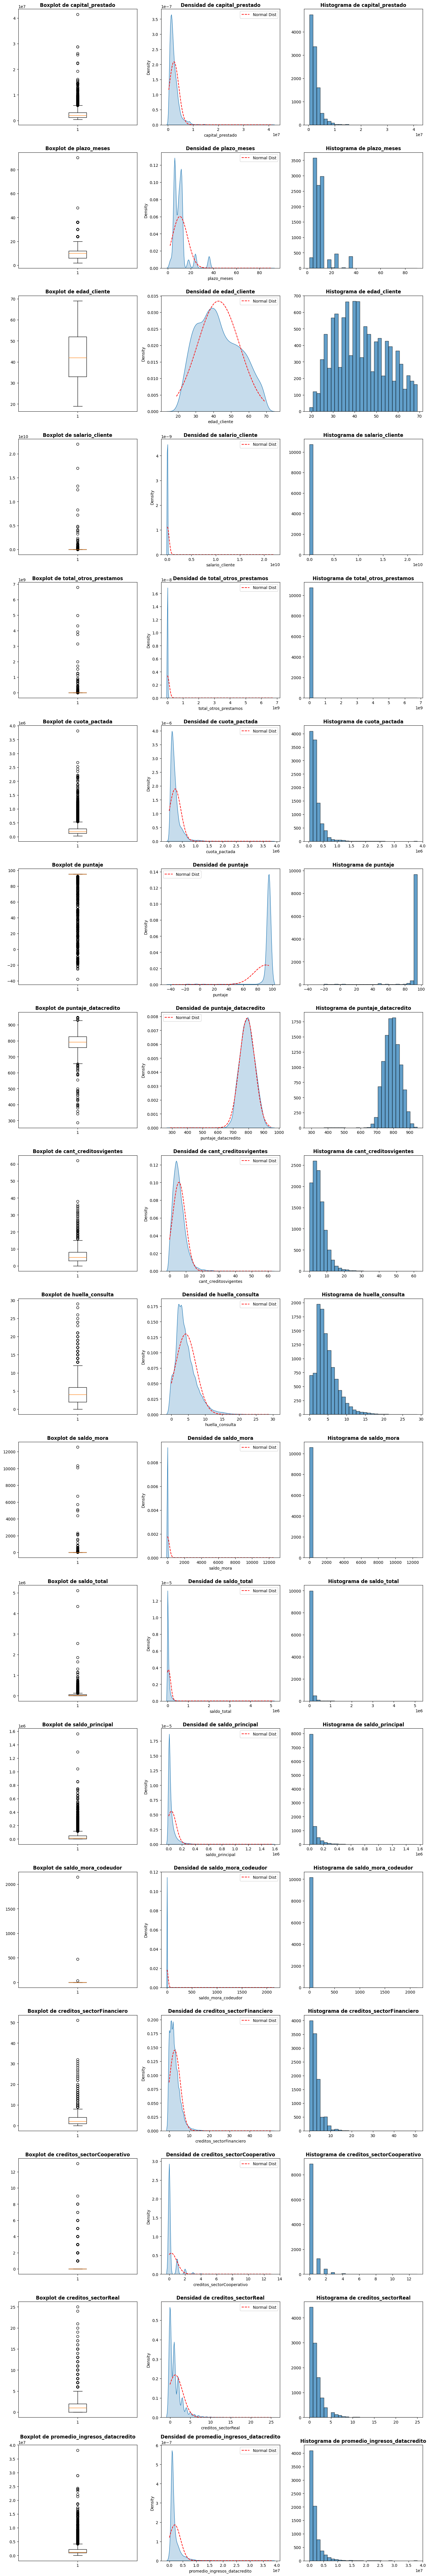

In [27]:
# Visualización de BoxPlot e Histograma de Densisdad para variables numéricas junto con la curva de distribución normal

if True:

    fig, axes = plt.subplots(nrows = len(col_nums), ncols = 3, figsize = (15, 5 * len(col_nums)))

    if len(col_nums) == 1:

        axes = axes.reshape(1, 3)

    for i, col in enumerate(col_nums):

        # Histograma

        axes[i, 2].hist(df[col].dropna(), bins = 30, edgecolor = "black", alpha = 0.7)
        axes[i, 2].set_title(f"Histograma de {col}", fontweight = 'bold')

        # Densidad

        sns.kdeplot(df[col], fill = True, ax = axes[i, 1])
        axes[i, 1].set_title(f"Densidad de {col}", fontweight = 'bold')

        # Distribución Nomal

        x = np.linspace(df[col].min(), df[col].max(), 200)
        p = st.norm.pdf(x, df[col].mean(), df[col].std())
        axes[i, 1].plot(x, p, 'r--', label = 'Normal Dist')
        axes[i, 1].legend()

        axes[i, 0].boxplot(df[col].dropna(), vert = 0) 
        axes[i, 0].set_title(f"Boxplot de {col}", fontweight = 'bold')       

    plt.tight_layout()
    plt.show()

# Anotaciones sobre las gráficas

* Los diagramas de cajas y bigotes (boxplots) son la prueba de confirmación de que todas las variables (excepto **edad_cliente** pues se eliminaron estos valores) tienen valores por fuera de la gráfica. De hecho, en algunas variables, la perspectiva es más fuerte, ya que ni aparece la caja para poder mostrar los valores extremos. 
* Los gráficos de densidad con la curva normal teórica muestran el resultado de los p-values del test. Los datos no siguen una distribución normal, los datos atípicos desvían y amplian esa distancia entre las 2 curvas. La diferencia entre algunas varias se evidencia en el sesgo y el desplazamiento de la distribución.
* Sobre algunas variables: 
    - La distribución de **capital_prestado** presenta un sesgo hacia la derecha, significa que la mayoría de los créditos son por montos bajos y existen pocos montos altísimos que hacen que se presente la curtosis alta. Estos valores no necesariamente son outliers, pueden ser reflejados en la realidad. También es bastante similar al caso de la **cuota_pactada** ya que estas 2 tienen cierto nivel de relación, pues la cuota dependerá del capital del prestamo.
    - El diagrama muestra que la mayoría de valores están entre 35 y 55 (edad adulta más productiva e independiente), los cuales son personas que pueden acceder a más créditos.
    - Las variables de los créditos (**creditos_sectorFinanciero**, **creditos_sectorCooperativo**, **creditos_sectorReal**) presentan sesgo a la derecha. Las personas comunmente tienen pocos préstamos en su vida o por lo menos no acumulan varios al mismo tiempo. Sin embargo, hay unos pocos regsitros con valores desfasados para la realidad. Sin embargo, no son atípicos, son totalmente plausibles.
    - Otro casos que valen la pena retomar son **puntaje** y **puntaje_datacredito**, que tienen distribuciones sesgadas hacia la izquieda, donde la mayorpia de valores son altos (personas con buen historial crediticio y buen comportamiento) y unas pocas personas con historial pauperrimo.
    - **plazo_meses** presenta en su gran mayoría valores pequeños (está sesgada a la derecha) pero unos pequeños picos se ven también a lo largo del eje.

# Análisis Numérico por Intervalos

In [28]:
# Creación de Tablas de Frcuencia para variables numéricas agrupadas por intervalos


# Generación de tabla de frecuencias para variable numérica agrupada en bins

def tabla_intervalos_numericos(df, col, bins = 5):

    # Creación de Intervalos 

    rangos = pd.cut(df[col], bins = bins)

    # Agrupación por intervalos y conteo de registros en cada intervalo

    tabla = (
        df.groupby(rangos, observed = False)[col]
          .count()
          .reset_index(name = "conteo")
          .sort_values(by = col)   
          .reset_index(drop = True)
    )

    # Calculo del procentaje de registros en cada intervalo

    tabla["porcentaje"] = (tabla["conteo"] / len(df) * 100)

    # Formatear porcentaje a dos decimales

    tabla["porcentaje"] = tabla["porcentaje"].map(lambda x: f"{x:.2f}%")

    return tabla

In [29]:
# Invocar la función

if True:

    for col in col_nums:

        print(f"\nTabla de Frecuencia para {col} agrupada en 5 intervalos:")

        display(tabla_intervalos_numericos(df, col, bins = 5))


Tabla de Frecuencia para capital_prestado agrupada en 5 intervalos:


capital_prestado  conteo porcentaje
0    (318915.847, 8576830.56]   10615     98.62%
1   (8576830.56, 16793661.12]     140      1.30%
2  (16793661.12, 25010491.68]       3      0.03%
3  (25010491.68, 33227322.24]       4      0.04%
4   (33227322.24, 41444152.8]       1      0.01%


Tabla de Frecuencia para plazo_meses agrupada en 5 intervalos:


plazo_meses  conteo porcentaje
0  (1.912, 19.6]    9880     91.80%
1   (19.6, 37.2]     881      8.19%
2   (37.2, 54.8]       1      0.01%
3   (54.8, 72.4]       0      0.00%
4   (72.4, 90.0]       1      0.01%


Tabla de Frecuencia para edad_cliente agrupada en 5 intervalos:


edad_cliente  conteo porcentaje
0  (18.95, 29.0]    1590     14.77%
1   (29.0, 39.0]    3024     28.10%
2   (39.0, 49.0]    2777     25.80%
3   (49.0, 59.0]    2056     19.10%
4   (59.0, 69.0]    1166     10.83%


Tabla de Frecuencia para salario_cliente agrupada en 5 intervalos:


salario_cliente  conteo porcentaje
0     (-22000000.0, 4400000000.0]   10755     99.93%
1    (4400000000.0, 8800000000.0]       4      0.04%
2   (8800000000.0, 13200000000.0]       1      0.01%
3  (13200000000.0, 17600000000.0]       2      0.02%
4  (17600000000.0, 22000000000.0]       1      0.01%


Tabla de Frecuencia para total_otros_prestamos agrupada en 5 intervalos:


total_otros_prestamos  conteo porcentaje
0  (-6787675.263, 1357535052.6]   10753     99.91%
1  (1357535052.6, 2715070105.2]       3      0.03%
2  (2715070105.2, 4072605157.8]       3      0.03%
3  (4072605157.8, 5430140210.4]       2      0.02%
4  (5430140210.4, 6787675263.0]       1      0.01%


Tabla de Frecuencia para cuota_pactada agrupada en 5 intervalos:


cuota_pactada  conteo porcentaje
0   (20151.192, 782505.6]   10501     97.57%
1   (782505.6, 1541067.2]     227      2.11%
2  (1541067.2, 2299628.8]      30      0.28%
3  (2299628.8, 3058190.4]       4      0.04%
4  (3058190.4, 3816752.0]       1      0.01%


Tabla de Frecuencia para puntaje agrupada en 5 intervalos:


puntaje  conteo porcentaje
0  (-38.143, -11.362]      67      0.62%
1   (-11.362, 15.285]     140      1.30%
2    (15.285, 41.933]     121      1.12%
3     (41.933, 68.58]     210      1.95%
4     (68.58, 95.228]   10225     95.00%


Tabla de Frecuencia para puntaje_datacredito agrupada en 5 intervalos:


puntaje_datacredito  conteo porcentaje
0     (286.34, 419.0]       8      0.07%
1      (419.0, 551.0]      12      0.11%
2      (551.0, 683.0]      85      0.79%
3      (683.0, 815.0]    7189     66.79%
4      (815.0, 947.0]    3310     30.75%


Tabla de Frecuencia para cant_creditosvigentes agrupada en 5 intervalos:


cant_creditosvigentes  conteo porcentaje
0        (-0.062, 12.4]   10176     94.55%
1          (12.4, 24.8]     550      5.11%
2          (24.8, 37.2]      35      0.33%
3          (37.2, 49.6]       1      0.01%
4          (49.6, 62.0]       1      0.01%


Tabla de Frecuencia para huella_consulta agrupada en 5 intervalos:


huella_consulta  conteo porcentaje
0   (-0.029, 5.8]    7904     73.44%
1     (5.8, 11.6]    2562     23.80%
2    (11.6, 17.4]     262      2.43%
3    (17.4, 23.2]      29      0.27%
4    (23.2, 29.0]       6      0.06%


Tabla de Frecuencia para saldo_mora agrupada en 5 intervalos:


saldo_mora  conteo porcentaje
0   (-12.534, 2506.8]   10599     98.48%
1    (2506.8, 5013.6]       2      0.02%
2    (5013.6, 7520.4]       3      0.03%
3   (7520.4, 10027.2]       0      0.00%
4  (10027.2, 12534.0]       3      0.03%


Tabla de Frecuencia para saldo_total agrupada en 5 intervalos:


saldo_total  conteo porcentaje
0  (-5116.066, 1023213.2]   10598     98.47%
1  (1023213.2, 2046426.4]       6      0.06%
2  (2046426.4, 3069639.6]       1      0.01%
3  (3069639.6, 4092852.8]       0      0.00%
4  (4092852.8, 5116066.0]       2      0.02%


Tabla de Frecuencia para saldo_principal agrupada en 5 intervalos:


saldo_principal  conteo porcentaje
0   (-1562.285, 312457.0]   10239     95.13%
1    (312457.0, 624914.0]     105      0.98%
2    (624914.0, 937371.0]      11      0.10%
3   (937371.0, 1249828.0]       1      0.01%
4  (1249828.0, 1562285.0]       2      0.02%


Tabla de Frecuencia para saldo_mora_codeudor agrupada en 5 intervalos:


saldo_mora_codeudor  conteo porcentaje
0     (-2.145, 429.0]   10171     94.50%
1      (429.0, 858.0]       1      0.01%
2     (858.0, 1287.0]       0      0.00%
3    (1287.0, 1716.0]       0      0.00%
4    (1716.0, 2145.0]       1      0.01%


Tabla de Frecuencia para creditos_sectorFinanciero agrupada en 5 intervalos:


creditos_sectorFinanciero  conteo porcentaje
0            (-0.051, 10.2]   10585     98.35%
1              (10.2, 20.4]     162      1.51%
2              (20.4, 30.6]      13      0.12%
3              (30.6, 40.8]       2      0.02%
4              (40.8, 51.0]       1      0.01%


Tabla de Frecuencia para creditos_sectorCooperativo agrupada en 5 intervalos:


creditos_sectorCooperativo  conteo porcentaje
0              (-0.013, 2.6]   10546     97.98%
1                 (2.6, 5.2]     197      1.83%
2                 (5.2, 7.8]      14      0.13%
3                (7.8, 10.4]       5      0.05%
4               (10.4, 13.0]       1      0.01%


Tabla de Frecuencia para creditos_sectorReal agrupada en 5 intervalos:


creditos_sectorReal  conteo porcentaje
0       (-0.025, 5.0]   10413     96.75%
1         (5.0, 10.0]     299      2.78%
2        (10.0, 15.0]      41      0.38%
3        (15.0, 20.0]       7      0.07%
4        (20.0, 25.0]       3      0.03%


Tabla de Frecuencia para promedio_ingresos_datacredito agrupada en 5 intervalos:


promedio_ingresos_datacredito  conteo porcentaje
0       (-38106.581, 7621316.2]    7625     70.84%
1       (7621316.2, 15242632.4]     184      1.71%
2      (15242632.4, 22863948.6]      17      0.16%
3      (22863948.6, 30485264.8]       6      0.06%
4      (30485264.8, 38106581.0]       1      0.01%

# Análisis de los Intervalos

* En modo resumen, para todas las columnas --> gran parte de los datos se pueden agrupar en pocos intervalos. Si gran cantidad de datos se pueden agrupar juntos, esto confirma el análisis previo y es que hay mucho datos poco dispersos o concentrados y unos poco que estan muy lejos de estos, por esto la media siempre está lejos de la "masa" de los datos.
* En **promedio_ingresos_datacredito** el 73% de los datos está entre COP $0 y los COP $15 M. Es rango amplio que concentra mchos valores.
* Incluso, hay otras variables como los 3 tipos de creditos y los saldos en donde un solo intervalo reune más del 95% del conteo de valores de la variable. 
* No vale la pena mirar variable por variable, ya que anteriormente se ha ahondado en cada una y estos conteos son pruebas de que los datos tiene colas pesadas, simetricas y la gran mayorís se agrupan en un rango de valores relativamente cercano.


# EDA Univariable (Categóricas)

In [30]:
#  Columnas Categóricas y sus valores

col_cats = df.select_dtypes(include = ['object', 'category']).columns

for col in col_cats:

    print(f'Columna: {col}')
    print(df[col].value_counts(dropna = False))
    print("--" * 15)

Columna: tipo_credito
tipo_credito
4     7747
9     2876
10     116
6       21
7        2
68       1
Name: count, dtype: int64
------------------------------
Columna: tipo_laboral
tipo_laboral
Empleado         6754
Independiente    4009
Name: count, dtype: int64
------------------------------
Columna: tendencia_ingresos
tendencia_ingresos
Creciente      5294
NaN            2990
Decreciente    1291
Estable        1188
Name: count, dtype: int64
------------------------------
Columna: Pago_atiempo
Pago_atiempo
Si    10252
No      511
Name: count, dtype: int64
------------------------------


* La variable categórica **tipo_credito** presenta un claro desbalanceo y frecuencia hacia los créditos de tipo 4, seguidos del 9. Y tmabién existen 3 tipos de créditos (7, 68, 6) con frecuencias muy bajas, algunas casi inexistentes. Explicitamente en porcentajes: La categoría 4 concentra casi el 74% , seguida por el tipo 9 con un 25%.
* Respecto a **tipo_laboral**, se evidencia un poco más de paridad aunque no en un 50/50. Esto es entendible porque es mucho más encontrar a alguien que sea empleado que independiente. Además a nivel de negocio, un empleado tiene menos riesgo por tener ingresos "estables" o continuos. La proporción indica un mercado más estructurado, con una mayor presencia de trabajadores que perciben ingresos fijos. Se observa un desequilibrio moderado en la distribución, aunque no resulta significativo.
* En la variable **tendencia_ingresos** (omitiendo los nulos, ya que tenía un serio problema de calidad de datos), la clase dominante es creciente con una vasta diferencia entre las otras 2 clases. La variable muestra una marcada inclinación hacia clientes con ingresos en aumento, lo que podría sugerir que el conjunto de datos está conformado por personas con un historial financiero favorable. No obstante, las categorías “decreciente” y “estable” también cuentan con una representación adecuada para ser incluidas en un modelo. Además, podría tratarse de un predictor relevante del riesgo de mora, dado que una tendencia a la baja en los ingresos puede estar vinculada a una mayor probabilidad de incumplimiento.
* En cuanto a la variable objetivo (**pago_atiempo**), como se pudo ver en el histograma de clases, que hay un desbalanceo muy evidente estre estas. De hecho el 95% de los registros corresponden a clientes que pagaron a tiempo y el resto son morosos --> Importante tener a la vista para hacer oversampling.

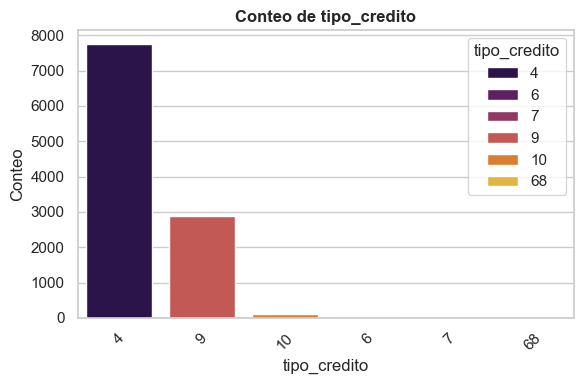

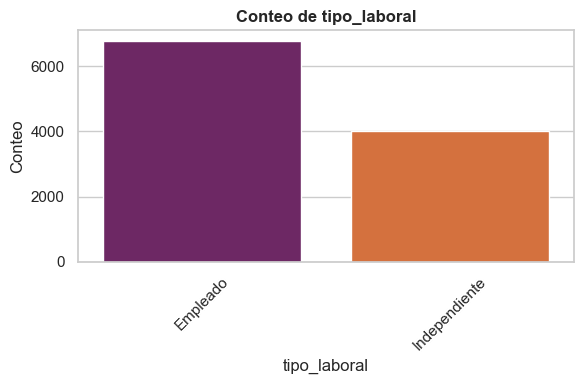

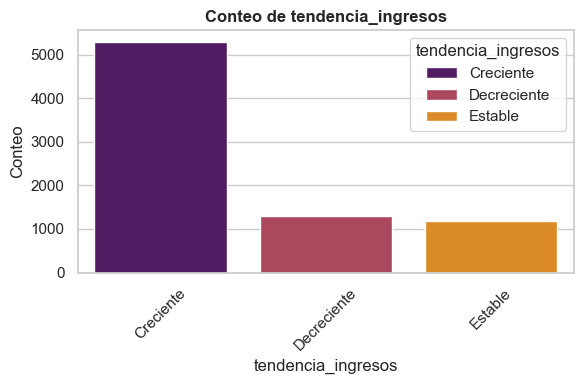

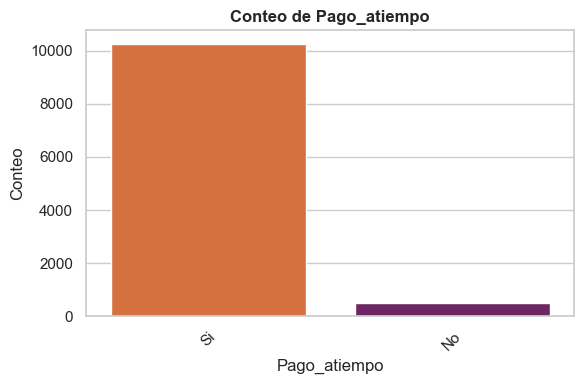

In [31]:
# Graficas variables categoricas

sns.set_theme(style = "whitegrid")

for i, col in enumerate(col_cats):

    plt.figure(figsize = (6, 4))
    sns.countplot(data = df, x = col, hue = col, order = df[col].value_counts().index, palette = 'inferno')
    plt.xticks(rotation = 45)
    plt.title('Conteo de ' + col, fontsize = 12, fontweight = 'bold')
    plt.tight_layout()
    plt.xlabel(col)
    plt.ylabel('Conteo')

    plt.show()

No hay mucho que decir sobre el las variables categóricas y la discrimanción respecto a la objetivo, ya que es de esperar que como hay tan pocos registros morosos, pues se vea un claro desequilibrio respecto a la otra clase.

# Análisis Bivariable (Numéricas)

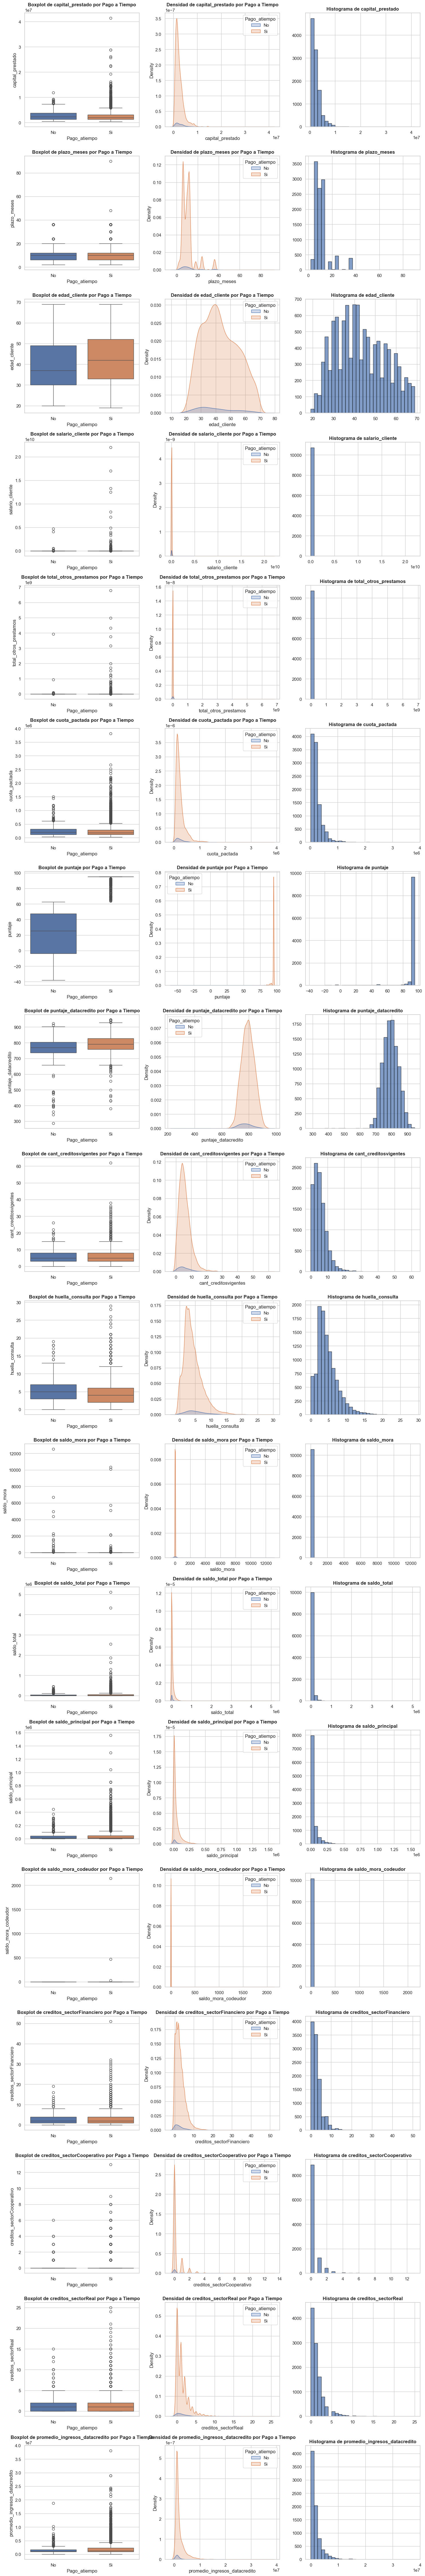

In [32]:
# Gráfico de Densidad y Boxplot respecto a la variable objetivo "Pago_atiempo"

if True:

    fig, axes = plt.subplots(nrows = len(col_nums), ncols = 3, figsize = (15, 5 * len(col_nums)))

    if len(col_nums) == 1:

        axes = axes.reshape(1, 3)

    for i, col in enumerate(col_nums):

        sns.kdeplot(data = df, x = col, hue = 'Pago_atiempo', fill = True, ax = axes[i, 1], warn_singular = False)
        axes[i, 1].set_title(f"Densidad de {col} por Pago a Tiempo", fontweight = 'bold')

        sns.boxplot(data = df, x = 'Pago_atiempo', y = col, hue = 'Pago_atiempo', ax = axes[i, 0])
        axes[i, 0].set_title(f"Boxplot de {col} por Pago a Tiempo", fontweight = 'bold')
        axes[i, 2].hist(df[col].dropna(), bins = 30, edgecolor = "black", alpha = 0.7)

        axes[i, 2].set_title(f"Histograma de {col}", fontweight = 'bold')
    plt.tight_layout()
    plt.show()

* Un insight valioso es lo que se refleja en **puntaje** (que sería la métrica interna de calificación a un cliente). Se ve una divergencia clara entre como es el puntaje de las personas que pagan y las que no: los morosos tienen puntajes bajos, aproximadamente entre 0 y 60; por otro lado, el puntaje de las personas que pagan, tiene como limite inferior 60 y se extiende hasta 100 (cerca a 100 se encuentra la mayoría de registros que cumplen con el pago).
* Otra reflexión importante es que el **saldo_total** de las personas que cumplen con los compromisos del crédito suele ser más alto que de las personas que no. 

# Análisis Bivariable (Categóricas)

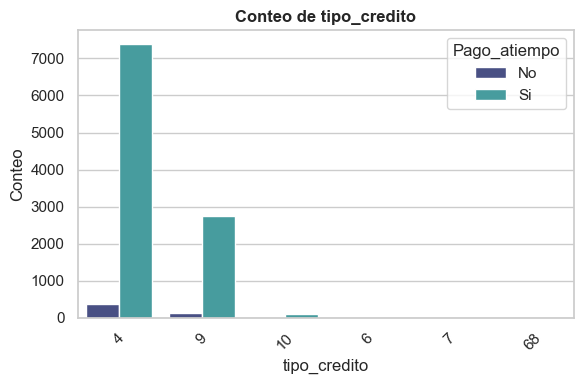

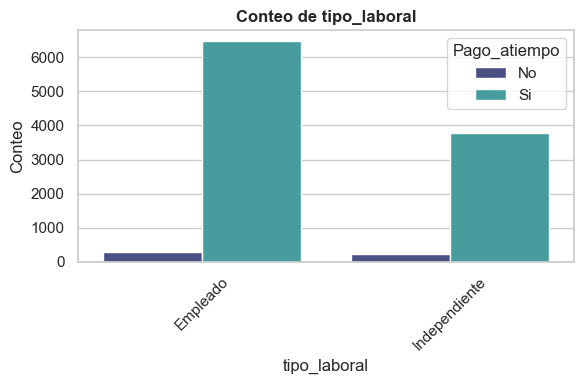

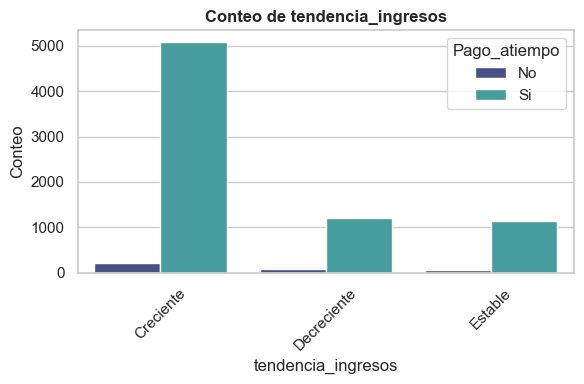

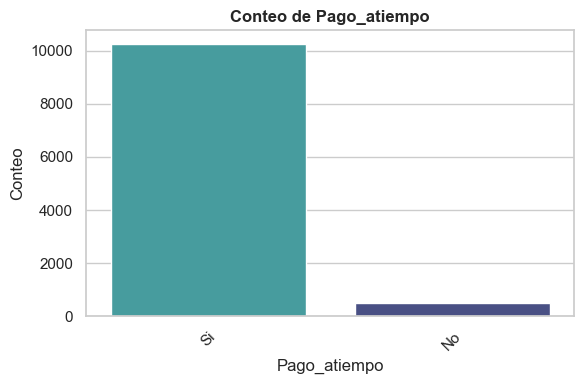

In [33]:
# Graficas variables categoricas

sns.set_theme(style = "whitegrid")

for i, col in enumerate(col_cats):

    plt.figure(figsize = (6, 4))
    sns.countplot(data = df, x = col, hue = 'Pago_atiempo', order = df[col].value_counts().index, palette = 'mako')
    plt.xticks(rotation = 45)
    plt.title('Conteo de ' + col, fontsize = 12, fontweight = 'bold')
    plt.tight_layout()
    plt.xlabel(col)
    plt.ylabel('Conteo')

    plt.show()

Estas 2  gráficas confirman que existen variables con capacidad real para discriminarr entre buenos y malos clientes; es decir, contienen señal predictiva. Sin embargo, la presencia de valores atípicos introduce un nivel considerable de ruido que distorsiona la lectura de los montos y dificulta apreciar con claridad las diferencias entr ambos grupos.

Desde una perspectiva analítica, los outliers no solo afectan la interpretación visual (aplanando distribuciones o exagerando rangos), sino que también pueden influir de manera desproporcionada en ciertos algoritmos sensibles a la magnitud de los datos. Esto provoca que parte de la información útil quede “opacada”, reduciendo el poder explicativo real de la variable.

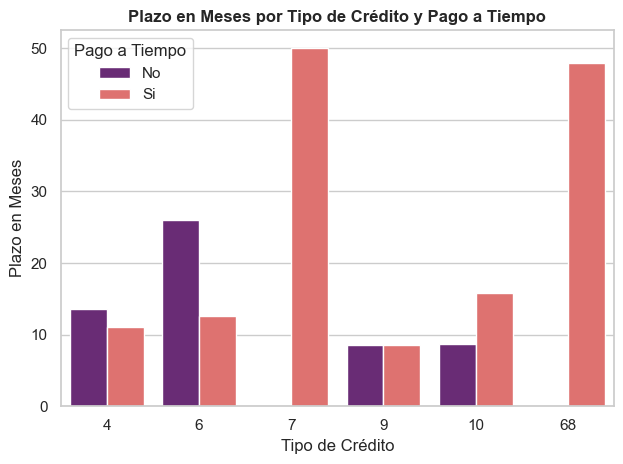

In [34]:
# Un solo grafico para gráfico entre plazo_meses con tipo_credito con Pago_atiempo

sns.barplot(
    data = df,
    x = 'tipo_credito',
    y = 'plazo_meses',
    hue = 'Pago_atiempo',
    palette = 'magma',
    errorbar = None
)

plt.title('Plazo en Meses por Tipo de Crédito y Pago a Tiempo', fontsize = 12, fontweight = 'bold')
plt.xlabel('Tipo de Crédito')
plt.ylabel('Plazo en Meses')
plt.legend(title = 'Pago a Tiempo')
plt.tight_layout()
plt.show()

El efecto del plazo depende del tipo de crédito. En algunos casos, los clientes que pagan a tiempo tienen plazos más largos, lo que podría indicar una mayor capacidad de pago o una preferencia por compromisos financieros más manejables. En otros casos, puede ser lo contrario, pero no es posible discrimar claramente sin un análisis más profundo, ya que el plazo también puede estar influenciado por otros factores como el monto del préstamo, el perfil del cliente o la política de crédito de la entidad financiera.

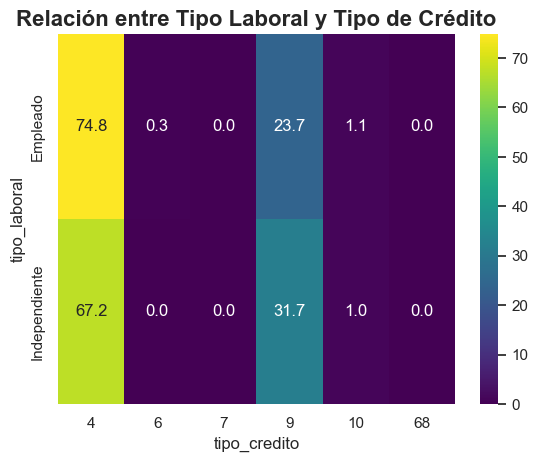

In [35]:
# Gráfica para la relación entre tipo_laboral y tipo_credito

contrato_credito = pd.crosstab(df["tipo_laboral"], df["tipo_credito"], normalize = "index") * 100

sns.heatmap(contrato_credito, annot = True, fmt = ".1f", cmap = "viridis")
plt.title("Relación entre Tipo Laboral y Tipo de Crédito", fontsize = 16, fontweight = 'bold')
plt.show()

Los empelados están ubicados principalmente en los créditos de tipo 4, mientras que los independientes tienen una mayor presencia en los créditos de tipo 9 y 4, respectivamente. Esto podría indicar que el tipo de crédito 4 es más accesible o adecuado para empleados, mientras que el tipo 9 podría estar diseñado para satisfacer las necesidades de los trabajadores independientes.

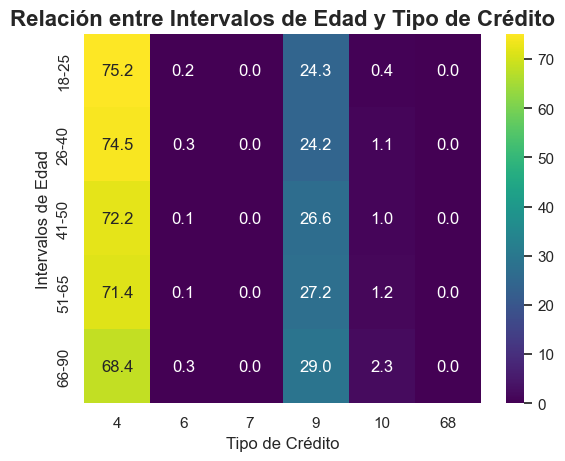

In [36]:
# Discretización de edad para comparar la el tipo de crédito

df['intervalos_edad'] = pd.cut(df['edad_cliente'], bins = [18, 25, 40, 50, 65, 90], labels = ['18-25', '26-40', '41-50', '51-65', '66-90'])

# Cross-tab entre intervalos de edad y tipo de crédito

cross_tab = pd.crosstab(df['intervalos_edad'], df['tipo_credito'], normalize = 'index') * 100

# Heatmap

sns.heatmap(cross_tab, annot = True, fmt = ".1f", cmap = "viridis")
plt.title("Relación entre Intervalos de Edad y Tipo de Crédito", fontsize = 16, fontweight = 'bold')
plt.xlabel("Tipo de Crédito")
plt.ylabel("Intervalos de Edad")
plt.show()

* El tipo 4 y el tipo 9 acaparan el 99% (aproximadamente) de todas los préstamos concedidos, sin importar la edad del cliente. Los Tipos 6, 7, 10 y 68 son nichos o segmentos con presencial baja. 
* El tipo 4 empieza alto en los jóvenes y baja poco a poco hasta los más adultos. El tipo 9 tiene un comportamiento opuesto. 

# Variables Derivadas

In [ ]:
# Variable Derivada Nueva # 1: Ratio Debt to Income (Cuota / Salario) 

# El ratio compara la cuota mensual del crédito con el salario mensual del cliente, expresado como un porcentaje. 
# Un DTI más bajo indica que el cliente tiene una carga de deuda menor en relación con sus ingresos, lo que generalmente 
# se considera menos riesgoso para los bancos. Básicamente es el porcentaje de los ingresos comprometidos para este crédito específico.

df['dti'] = df['cuota_pactada'] / df['salario_cliente'] 

In [ ]:
# Variable Derivada Nueva # 2: Apalancamiento ((Capital Prestado + Total Otros Préstamos) / Salario)

# El apalancamiento mide la proporción de deuda total (capital prestado más otros préstamos) en relación con el salario del cliente.
# Un apalancamiento más alto indica que el cliente tiene una mayor carga de deuda en relación con sus ingresos, lo que puede ser un 
# indicador de mayor riesgo crediticio.

df['apalancamiento'] = (df['capital_prestado'] + df['total_otros_prestamos']) / df['salario_cliente']

In [39]:
# Variable Derivada Nueva # 3: Exposición por Punto (Capital Prestado / Puntaje Datacredito)

# La exposición por punto mide cuánto capital está prestado por cada punto del puntaje de crédito del cliente.
# Un valor más alto de exposición por punto puede indicar un mayor riesgo, ya que el cliente
# tiene más capital prestado en relación con su puntaje de crédito, lo que podría dificultar el pago a tiempo.

df['exposicion_por_punto'] = df['capital_prestado'] / df['puntaje_datacredito']

In [ ]:
# Variable Derivada Nueva # 4: Intensidad de Credito (Cantidad Creditos Vigentes / Edad del Cliente)

# La intensidad de crédito mide la cantidad de créditos vigentes que tiene el cliente en relación con su edad.
# Un valor más alto de intensidad de crédito puede indicar un mayor riesgo, ya que el cliente tiene más créditos activos en relación
# con su edad, lo que podría reflejar una mayor dependencia del crédito y una posible dificultad para manejar múltiples obligaciones financieras.

df['intensidad_credito'] = df['cant_creditosvigentes'] / df['edad_cliente']

# Comportamientos Relevantes EDA Bivariado

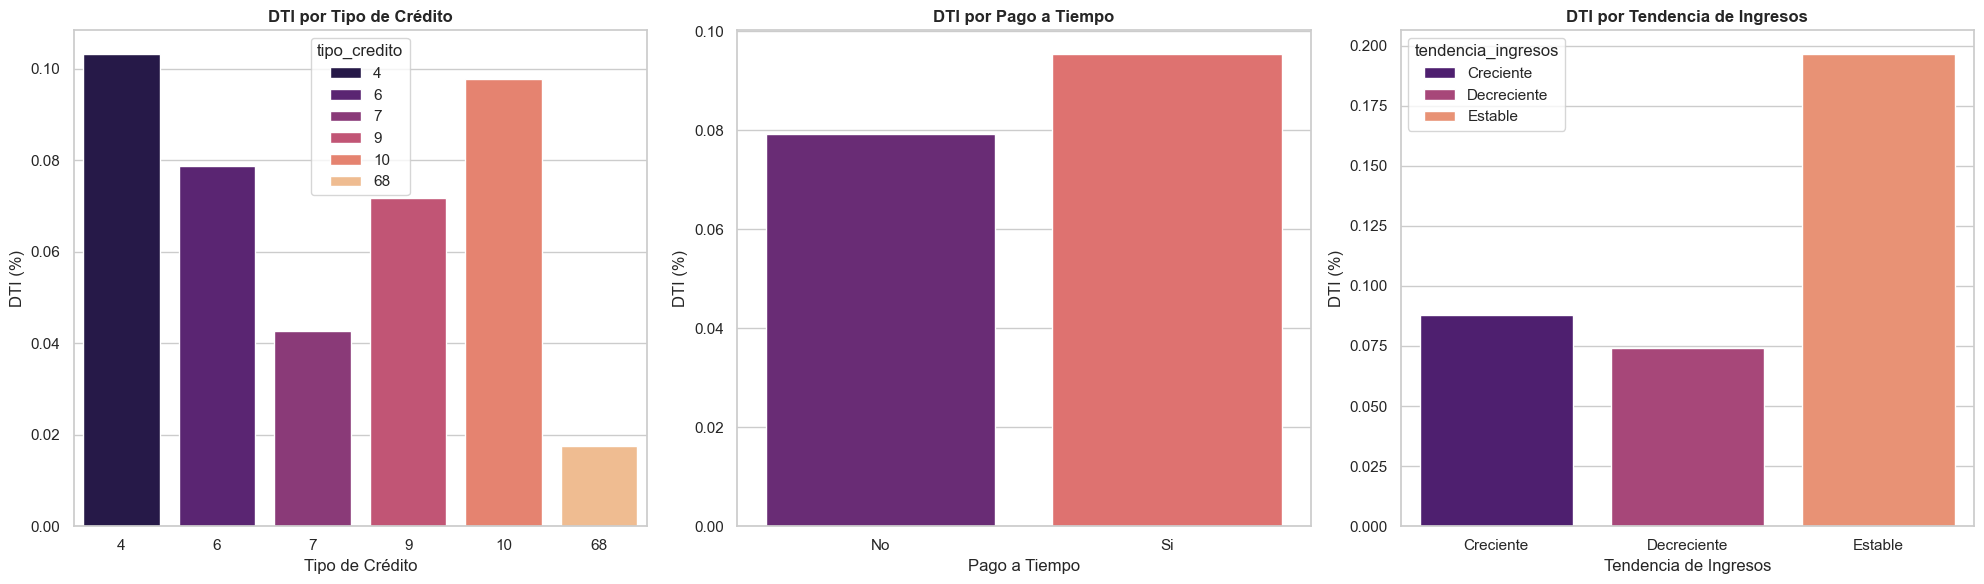

In [41]:
# DTI respescto a otras variables (tipo_credito, pago_atiempo, tendencia_ingresos)

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

# 1. DTI por Tipo de Crédito

sns.barplot(
    data = df,
    x = 'tipo_credito',
    y = 'dti',
    hue = 'tipo_credito',
    palette = 'magma',
    errorbar = None,
    ax = axes[0]
)

axes[0].set_title('DTI por Tipo de Crédito', fontsize = 12, fontweight = 'bold')
axes[0].set_xlabel('Tipo de Crédito')
axes[0].set_ylabel('DTI (%)')

# 2. DTI por Pago a Tiempo

sns.barplot(
    data = df,
    x = 'Pago_atiempo',
    y = 'dti',
    hue = 'Pago_atiempo',
    palette = 'magma',
    errorbar = None,
    ax = axes[1]
)

axes[1].set_title('DTI por Pago a Tiempo', fontsize = 12, fontweight = 'bold')
axes[1].set_xlabel('Pago a Tiempo')
axes[1].set_ylabel('DTI (%)')

# 3. DTI por Tendencia de Ingresos

sns.barplot(
    data = df,
    x = 'tendencia_ingresos',
    y = 'dti',
    hue = 'tendencia_ingresos',
    palette = 'magma',
    errorbar = None,
    ax = axes[2]
)

axes[2].set_title('DTI por Tendencia de Ingresos', fontsize = 12, fontweight = 'bold')
axes[2].set_xlabel('Tendencia de Ingresos')
axes[2].set_ylabel('DTI (%)')

plt.tight_layout()
plt.show()

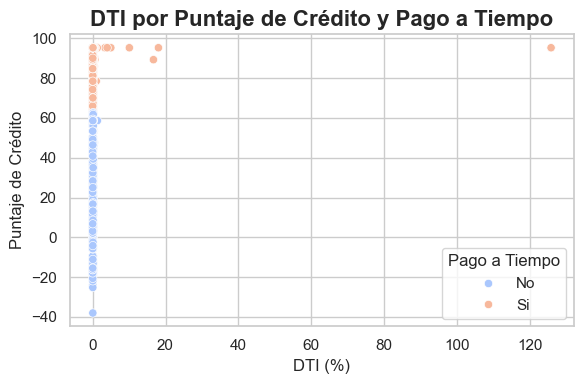

In [42]:
# DTI con repecto a puntaje y resultado de pago a tiempo

plt.figure(figsize = (6, 4))

sns.scatterplot(data = df, x = 'dti', y = 'puntaje', hue = 'Pago_atiempo', palette = 'coolwarm')
plt.title('DTI por Puntaje de Crédito y Pago a Tiempo', fontsize = 16, fontweight = 'bold')
plt.xlabel('DTI (%)')
plt.ylabel('Puntaje de Crédito')
plt.legend(title = 'Pago a Tiempo')
plt.tight_layout()
plt.show()

* *DTI por Tipo de Crédito* --> Evidentemente el tipo 10 y 4 son los que comprometen una mayor parte del salario del cliente (alrededor del 10% del sueldo), aunque es evidente que la conseción de créditos se da a imdividuos con bajo nivel de endeudamiento relativo. 
* *DTI por Pago a Tiempo* --> Con respecto a la variable objetivo, parece ser que el DTI no es un claro discriminante para ver si alguien paga o no, pues a pesar de que el endeudamiento (cuota) sobre el salario es relativamente bajo, es equilibrado entre ambas clases.
* *DTI por Tendencia Ingresos* --> Las personas con ingresos "Estables" tienen un DTI brutalmente más alto (casi 20%) comparado con los de tendencia "Creciente" o "Decreciente" (que rondan el 8%). A una persona con ingreso estable le permiten endeudarse un poco más (aminora el riesgo), además como su salario no crece, puede tener una cuota que fluctúa.
* *DTI respecto a puntaje y pago a tiempo* --> Acá la relación es evidente y nso demuestra la importancia del puntaje. Es la variable que determina si se da un credito o si se temrina pagando, inclusive pesa más que la carga o la porción que se come la cuota del ingreso.

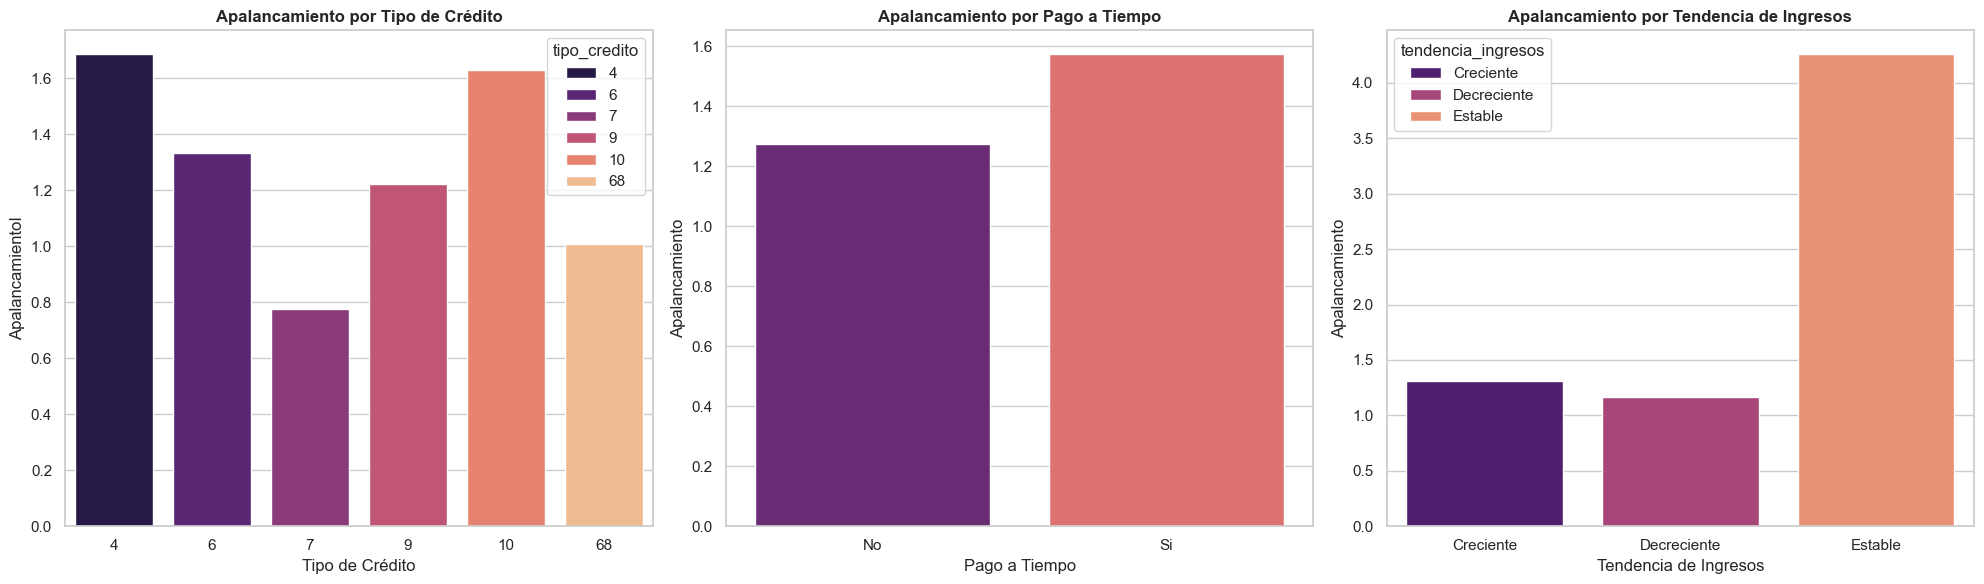

In [43]:
# Apalancamiento respescto a otras variables (tipo_credito, pago_atiempo, tendencia_ingresos)

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

# 1. Apalancamiento por Tipo de Crédito

sns.barplot(
    data = df,
    x = 'tipo_credito',
    y = 'apalancamiento',
    hue = 'tipo_credito',
    palette = 'magma',
    errorbar = None,
    ax = axes[0]
)

axes[0].set_title('Apalancamiento por Tipo de Crédito', fontsize = 12, fontweight = 'bold')
axes[0].set_xlabel('Tipo de Crédito')
axes[0].set_ylabel('ApalancamientoI')

# 2. ApalancamientoDTI por Pago a Tiempo

sns.barplot(
    data = df,
    x = 'Pago_atiempo',
    y = 'apalancamiento',
    hue = 'Pago_atiempo',
    palette = 'magma',
    errorbar = None,
    ax = axes[1]
)

axes[1].set_title('Apalancamiento por Pago a Tiempo', fontsize = 12, fontweight = 'bold')
axes[1].set_xlabel('Pago a Tiempo')
axes[1].set_ylabel('Apalancamiento')

# 3. Apalancamiento por Tendencia de Ingresos

sns.barplot(
    data = df,
    x = 'tendencia_ingresos',
    y = 'apalancamiento',
    hue = 'tendencia_ingresos',
    palette = 'magma',
    errorbar = None,
    ax = axes[2]
)

axes[2].set_title('Apalancamiento por Tendencia de Ingresos', fontsize = 12, fontweight = 'bold')
axes[2].set_xlabel('Tendencia de Ingresos')
axes[2].set_ylabel('Apalancamiento')

plt.tight_layout()
plt.show()

* *Apalancamiento por Tipo de Crédito* --> Los clientes con créditos de tipo 4 y 10 deben alrededor de 1.6 veces su salario mensual. Podríamos suponer que el perfil del cliente del tipo 7 se les presta mucho dinero  pero su apalancamiento es bajo, esto quiere decir que sus salarios sean muy altos y los pueden cubrir o que tiene 0 deudas o de muy poca cuantía.
* *Apalancamiento por Tendencia Ingreso* --> Los clientes con ingresos estabñes tiene apalancamiento 4 veces su sueldo mensual, en cambio a los demás les permiten alrededor de 1,2 veces su salario. El banco confía más en en flujos de caja futuros que están asegurados.

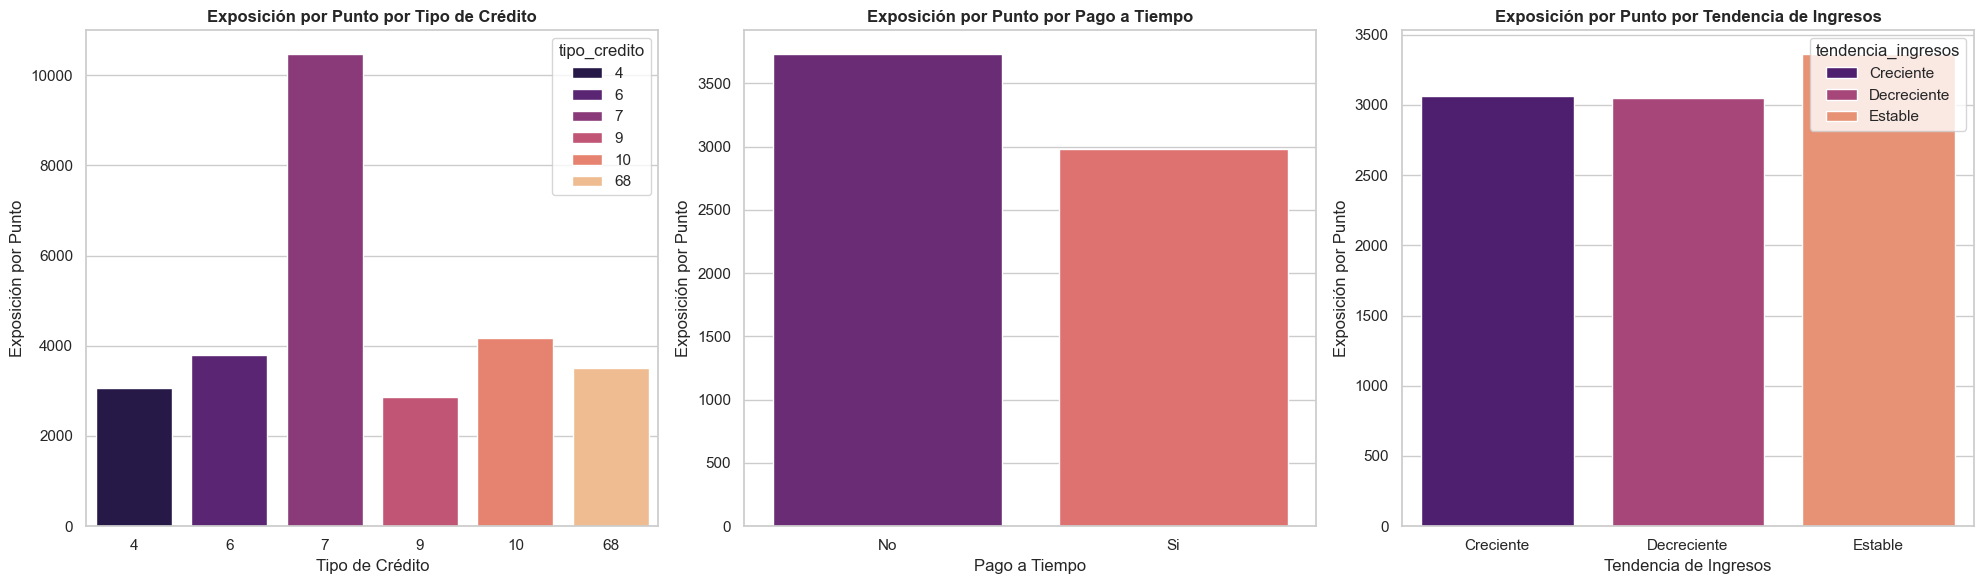

In [44]:
# Exposición por Punto respecto a otras variables (tipo_credito, pago_atiempo, tendencia_ingresos)

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

# 1. Exposición por Punto por Tipo de Crédito

sns.barplot(
    data = df,
    x = 'tipo_credito',
    y = 'exposicion_por_punto',
    hue = 'tipo_credito',
    palette = 'magma',
    errorbar = None,
    ax = axes[0]
)

axes[0].set_title('Exposición por Punto por Tipo de Crédito', fontsize = 12, fontweight = 'bold')
axes[0].set_xlabel('Tipo de Crédito')
axes[0].set_ylabel('Exposición por Punto')

# 2. Exposición por Punto por Pago a Tiempo

sns.barplot(
    data = df,
    x = 'Pago_atiempo',
    y = 'exposicion_por_punto',
    hue = 'Pago_atiempo',
    palette = 'magma',
    errorbar = None,
    ax = axes[1]
)

axes[1].set_title('Exposición por Punto por Pago a Tiempo', fontsize = 12, fontweight = 'bold')
axes[1].set_xlabel('Pago a Tiempo')
axes[1].set_ylabel('Exposición por Punto')

# 3. Exposición por Punto por Tendencia de Ingresos

sns.barplot(
    data = df,
    x = 'tendencia_ingresos',
    y = 'exposicion_por_punto',
    hue = 'tendencia_ingresos',
    palette = 'magma',
    errorbar = None,
    ax = axes[2]
)

axes[2].set_title('Exposición por Punto por Tendencia de Ingresos', fontsize = 12, fontweight = 'bold')
axes[2].set_xlabel('Tendencia de Ingresos')
axes[2].set_ylabel('Exposición por Punto')

plt.tight_layout()
plt.show()

* *Exposición por Punto por Tipo de Crédito* --> En este caso el crédito tipo 7 tiene una exposición gigantesca (más de COP $10K por punto), casi el triple que el tipo 4. Los bancos o instituciones se atreven a prestar muchísimo dinero por cada punto de score solo si hay colateral o algún activo para responder.
* *Exposición por Punto por Pago a tiempo* --> Las personas que no pagaron a tiempo tienen una exposicón promedio de COP $3500. Una diferencia del 16% respecto a los que si. Es decir, si se le presta mucho dinero a una persona en proporción a su puntaje, el riesgo de impago aumenta.

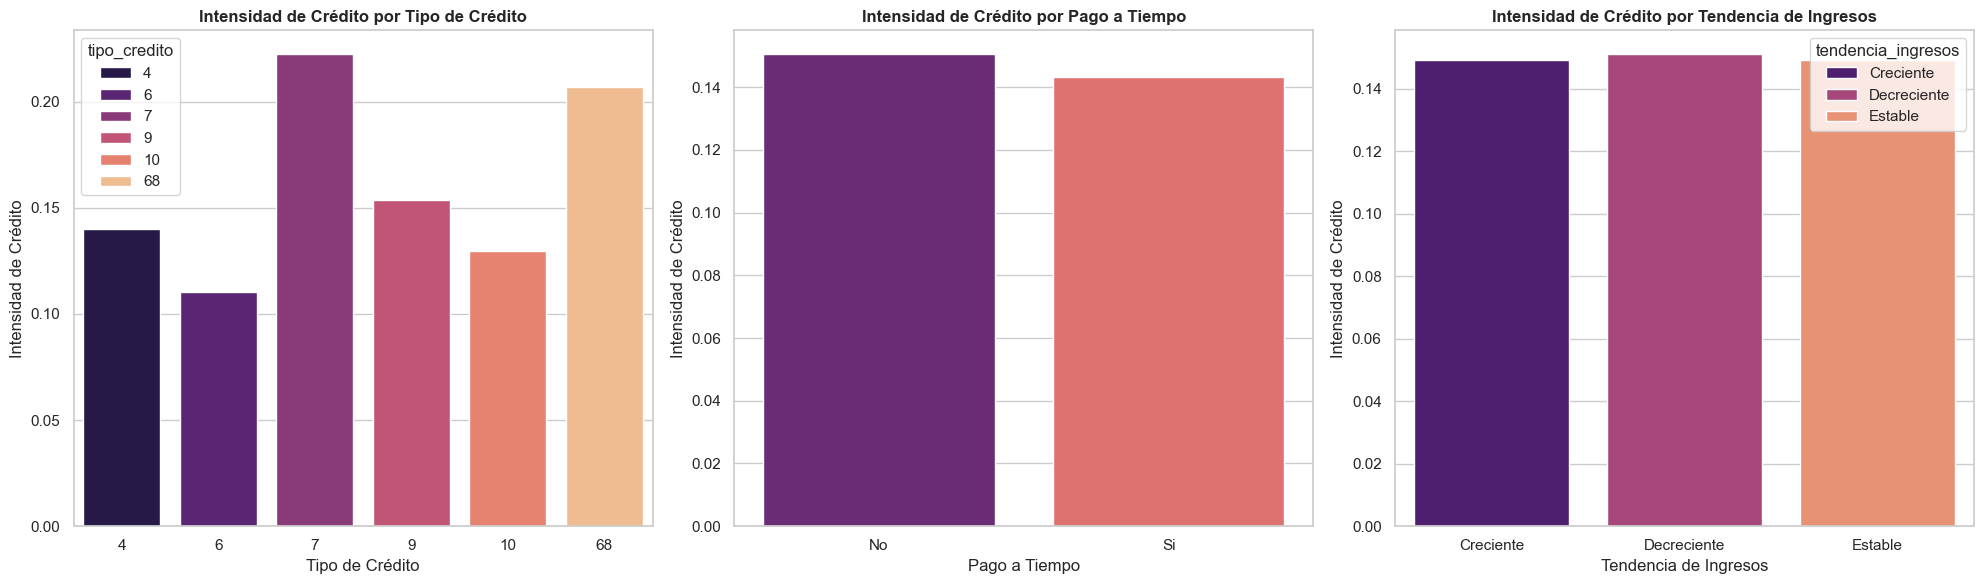

In [45]:
# Intensidad de Credito respescto a otras variables (tipo_credito, pago_atiempo, tendencia_ingresos)

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

# 1. Intensidad de Credito por Tipo de Crédito

sns.barplot(
    data = df,
    x = 'tipo_credito',
    y = 'intensidad_credito',
    hue = 'tipo_credito',
    palette = 'magma',
    errorbar = None,
    ax = axes[0]
)

axes[0].set_title('Intensidad de Crédito por Tipo de Crédito', fontsize = 12, fontweight = 'bold')
axes[0].set_xlabel('Tipo de Crédito')
axes[0].set_ylabel('Intensidad de Crédito')

# 2. Intensidad de Credito por Pago a Tiempo

sns.barplot(
    data = df,
    x = 'Pago_atiempo',
    y = 'intensidad_credito',
    hue = 'Pago_atiempo',
    palette = 'magma',
    errorbar = None,
    ax = axes[1]
)

axes[1].set_title('Intensidad de Crédito por Pago a Tiempo', fontsize = 12, fontweight = 'bold')
axes[1].set_xlabel('Pago a Tiempo')
axes[1].set_ylabel('Intensidad de Crédito')

# 3. Intensidad de Credito por Tendencia de Ingresos

sns.barplot(
    data = df,
    x = 'tendencia_ingresos',
    y = 'intensidad_credito',
    hue = 'tendencia_ingresos',
    palette = 'magma',
    errorbar = None,
    ax = axes[2]
)

axes[2].set_title('Intensidad de Crédito por Tendencia de Ingresos', fontsize = 12, fontweight = 'bold')
axes[2].set_xlabel('Tendencia de Ingresos')
axes[2].set_ylabel('Intensidad de Crédito')

plt.tight_layout()
plt.show()

* *Intensidad Crediticia por Tipo de Crédito* --> Los tipos 7 y 68 sobrepasan el indicador. Un valor alto aquí significa que el cliente tiene pocos años de edad pero muchos créditos activos.
* *Intensidad Crediticia por Pago a tiempo* --> No hay una diferencia que pueda indentificar si alguien paga o no en función de la intensidad de créditos en su vida.
* *Intensidad Crediticia por Tendencia Ingreso* --> La intensidad crediticia no depende de cómo se comportan los ingresos. Una persona adquiere créditos desde la juventud independientemente de si su salario está subiendo, bajando o estable.

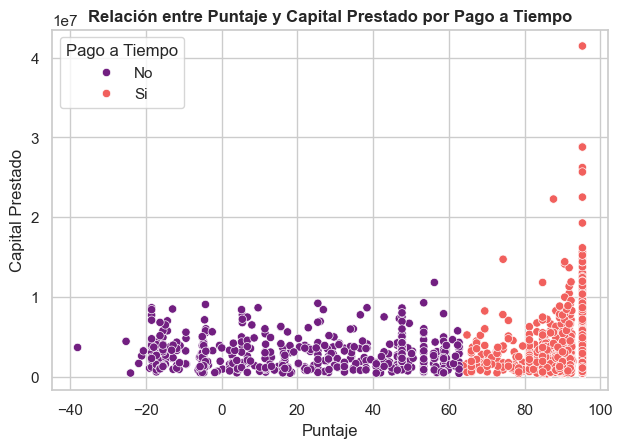

In [46]:
# Relación entre Puntaje y Capital Prestado por Pago a Tiempo

sns.scatterplot(data = df, x = 'puntaje', y = 'capital_prestado', hue = 'Pago_atiempo', palette = 'magma')
plt.title('Relación entre Puntaje y Capital Prestado por Pago a Tiempo', fontsize = 12, fontweight = 'bold')
plt.xlabel('Puntaje')
plt.ylabel('Capital Prestado')
plt.legend(title = 'Pago a Tiempo')
plt.tight_layout()
plt.show()

* No suele salir bien el prestarle dinero a personas con  puntaje por debajo de 60, aunque el capital sea bajo. Ninguna persona con puntaje superior a 62-64 dejó de pagar a tiempo independientemente del monto del crédito.
* Los clientes que caen en la zona morada (los morosos) nunca superan los COP $15M de pesos en capital prestado. 

# Análisis Multivariable

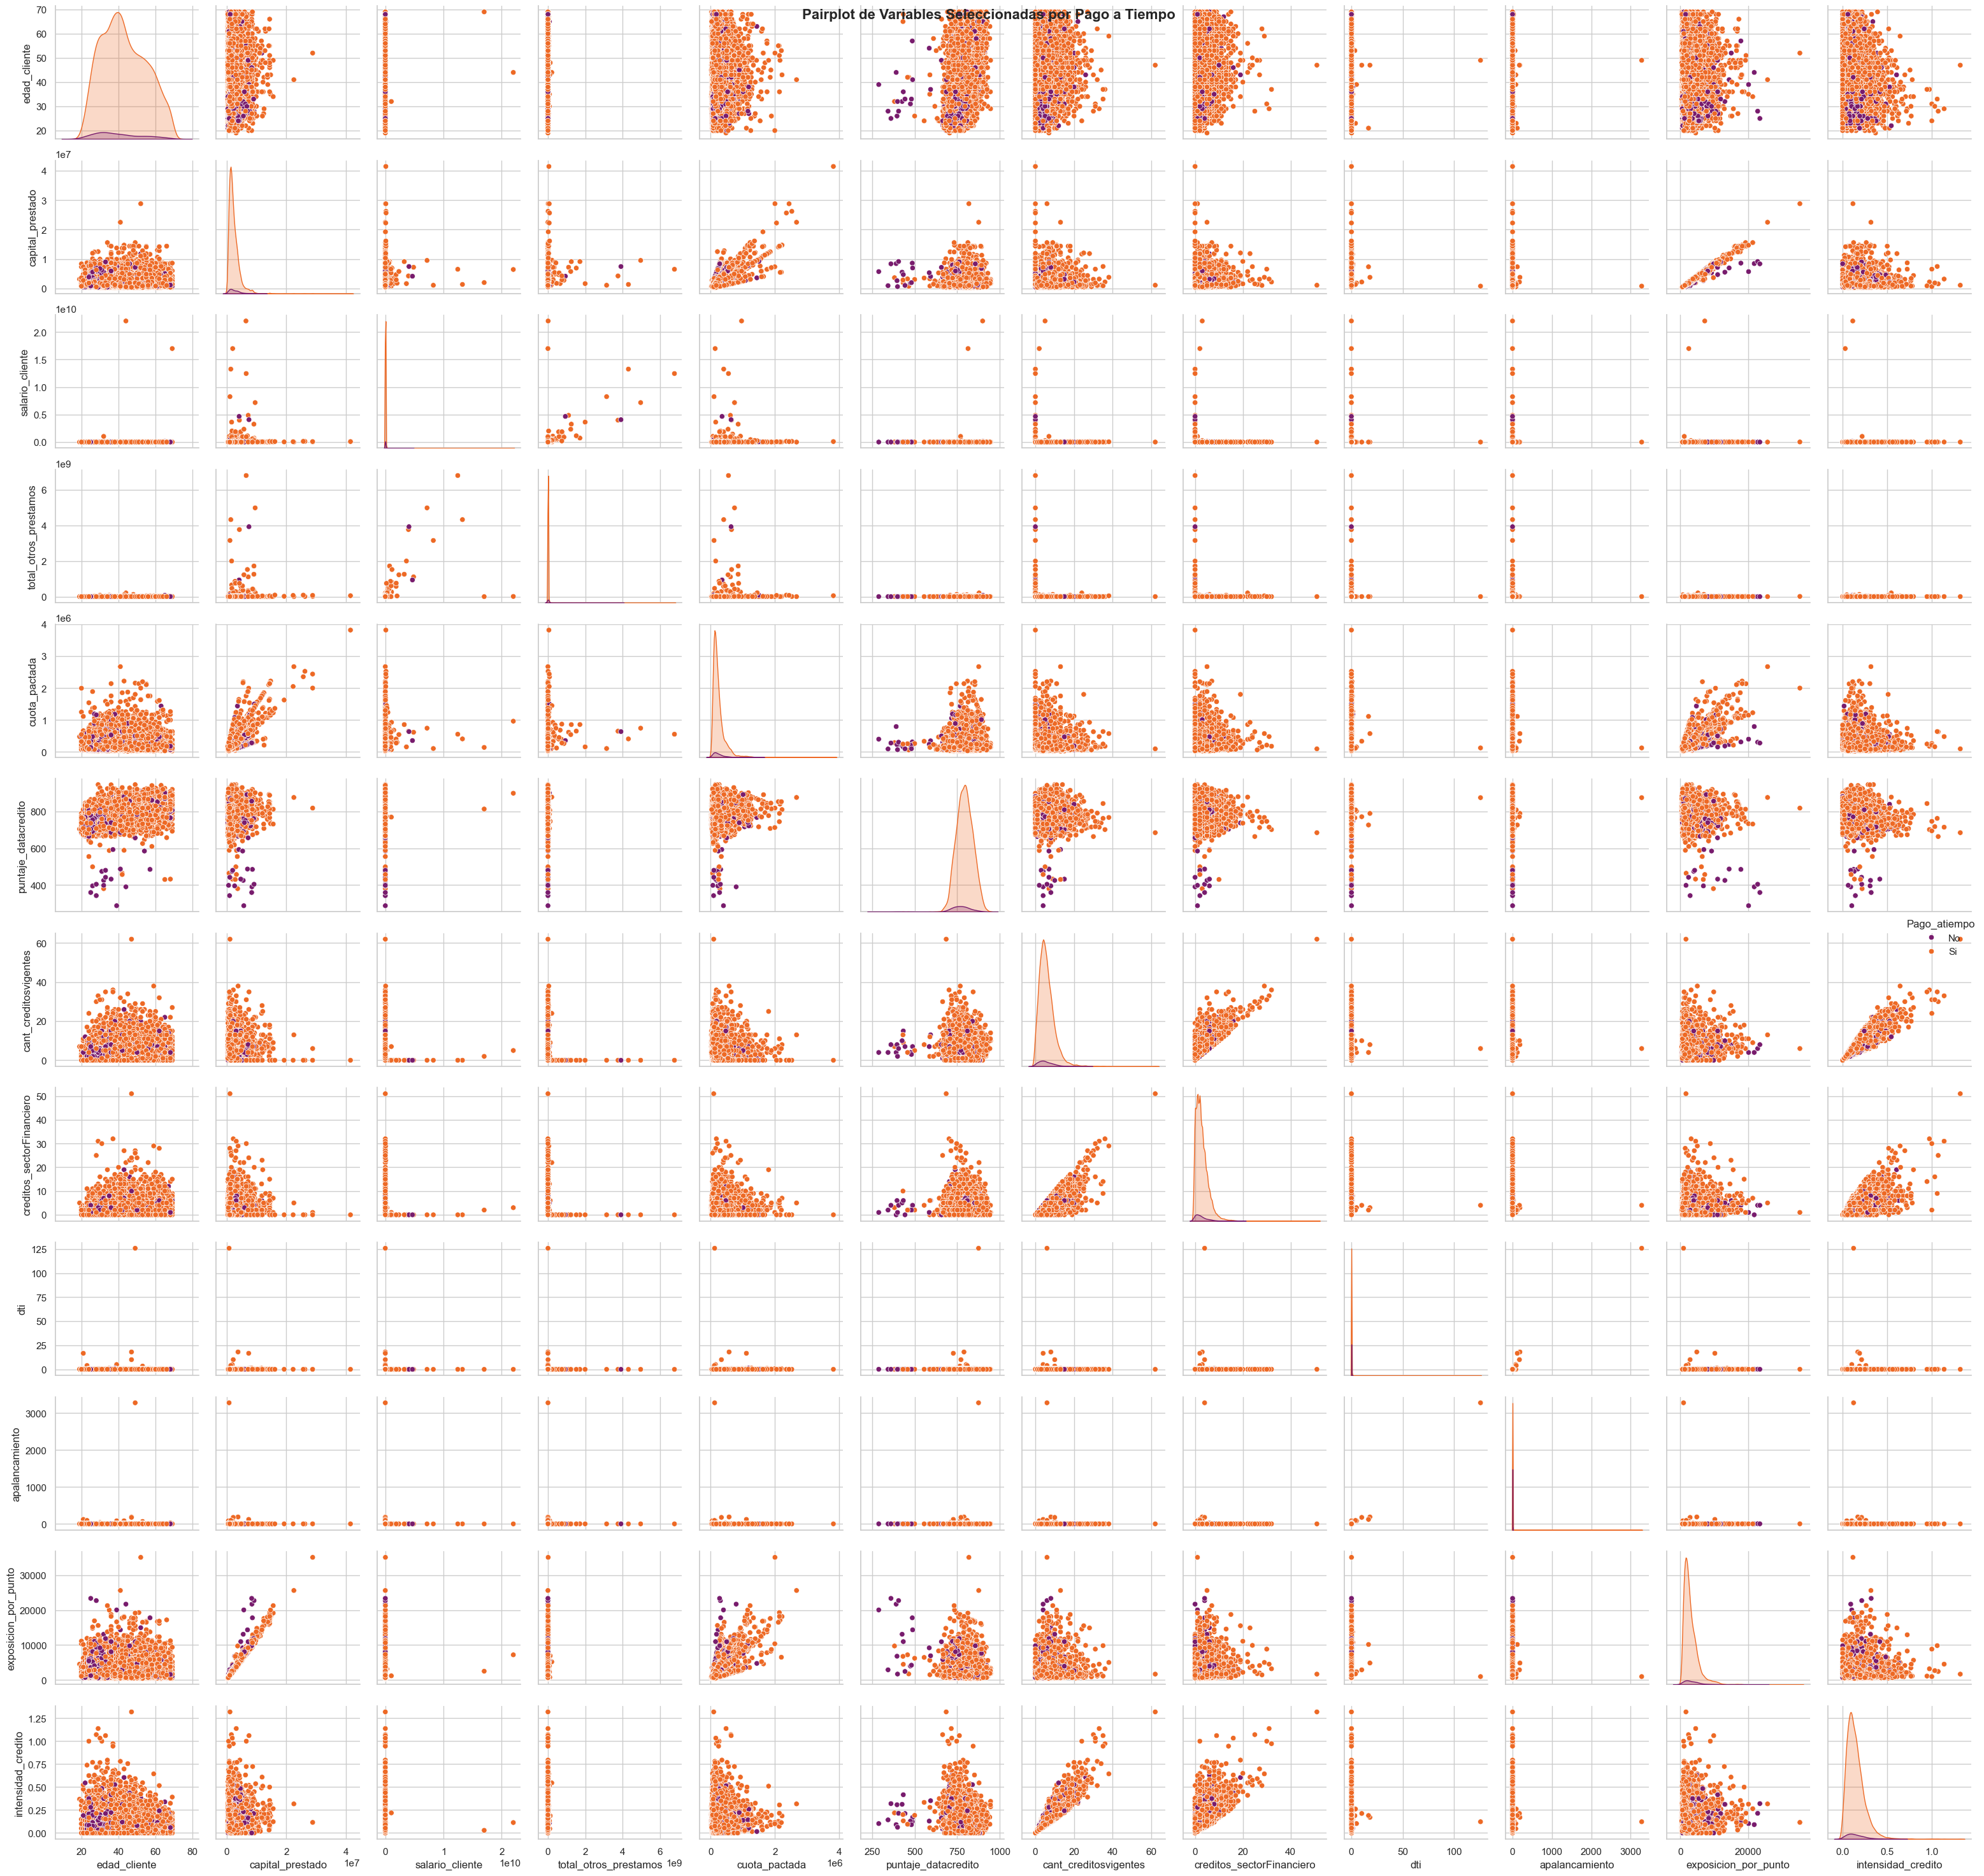

In [47]:
# Pairplot entre variables seleccionadas respecto a la variable objetivo "Pago_atiempo"

variables_seleccioandas = ['edad_cliente', 'capital_prestado', 'salario_cliente', 'total_otros_prestamos',
                           'cuota_pactada', 'puntaje_datacredito', 'cant_creditosvigentes', 
                           'creditos_sectorFinanciero', 'dti', 'apalancamiento', 'exposicion_por_punto', 'intensidad_credito']

sns.pairplot(df[variables_seleccioandas + ['Pago_atiempo']], hue = 'Pago_atiempo', palette = 'inferno', diag_kind = 'kde')
plt.suptitle('Pairplot de Variables Seleccionadas por Pago a Tiempo', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()

<Axes: >

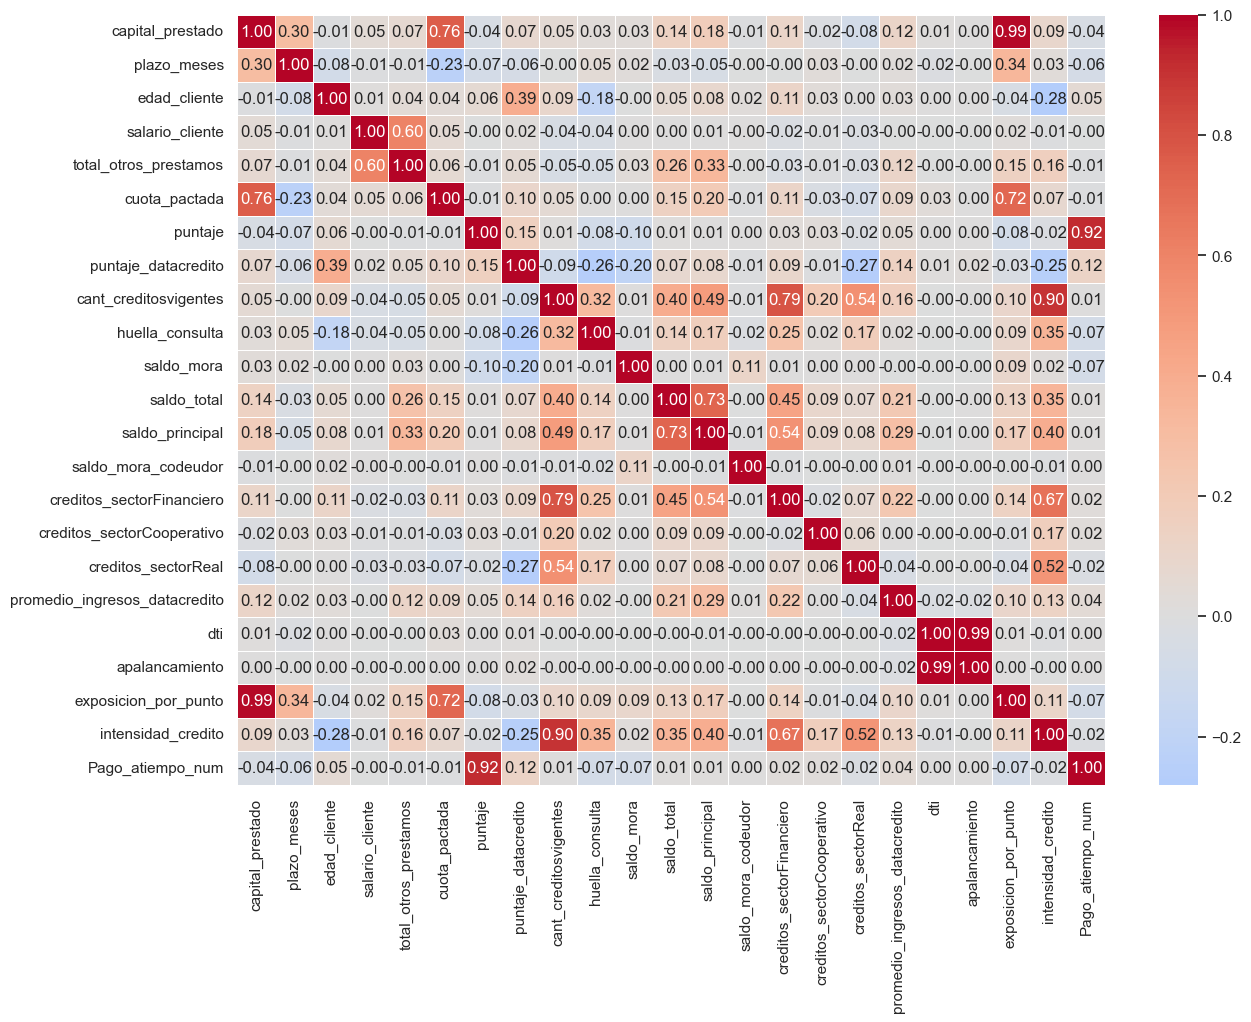

In [48]:
# Matriz de Correlación para variables numéricas y Heatmap

df['Pago_atiempo_num'] = df['Pago_atiempo'].map({'No':0, 'Si':1})
df['Pago_atiempo_num'] = df['Pago_atiempo_num'].astype('int64')

col_nums = df.select_dtypes(['int64', 'float64']).columns

correlation_matrix = df[col_nums].corr()

plt.figure(figsize = (14, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, center = 0)

# Anotaciones EDA Multivarible

* Respecto a la variable objetivo, se evidencia que el puntaje es el factor más determinante para predecir el pago a tiempo. Esto se debe a que el puntaje, como una métrica interna de evaluación crediticia, refleja el comportamiento financiero del cliente. De resto, no podemos concluir más respecto a pago_atiempo.
* Las variables creadas o derivadas tienen alta correlación con las variables originales, lo que es lógico porque se derivan de estas. Sin embargo, no tienen una correlación tan alta entre sí, lo que indica que cada una aporta información diferente sobre el cliente. Excepto por DTI y el apalancamiento, que tienen una correlación de 0.99, lo que es lógico porque ambos miden la relación entre la deuda y el ingreso del cliente.
* La cantidad de créditos en el sector financiero tiene una correlación positiva con la cantidad de créditos vigentes, ya que ambas reflejan la cantidad de créditos.
* El capital prestado tiene una correlación positiva con la cuota pactada, lo que es lógico porque a mayor capital, mayor cuota. Sin embargo, esta relación no es perfecta, lo que sugiere que otros factores (como el plazo del crédito o la tasa de interés) también influyen en la cuota.

In [49]:
# Mostrar las variables redundantes con alta correlación mayor a un umbral de 0.7

umbral = 0.7

for i in range(len(correlation_matrix.columns)):

    for j in range(i):

        if abs(correlation_matrix.iloc[i, j]) > umbral:

            print(f"Variables con alta correlación: {correlation_matrix.columns[i]} y {correlation_matrix.columns[j]} - Correlación: {correlation_matrix.iloc[i, j]:.2f}")

Variables con alta correlación: cuota_pactada y capital_prestado - Correlación: 0.76
Variables con alta correlación: saldo_principal y saldo_total - Correlación: 0.73
Variables con alta correlación: creditos_sectorFinanciero y cant_creditosvigentes - Correlación: 0.79
Variables con alta correlación: apalancamiento y dti - Correlación: 0.99
Variables con alta correlación: exposicion_por_punto y capital_prestado - Correlación: 0.99
Variables con alta correlación: exposicion_por_punto y cuota_pactada - Correlación: 0.72
Variables con alta correlación: intensidad_credito y cant_creditosvigentes - Correlación: 0.90
Variables con alta correlación: Pago_atiempo_num y puntaje - Correlación: 0.92


In [50]:
# Drop de la variable numérica "Pago_atiempo_num" que se creó para el análisis de correlación e intervalos_edad

df.drop(columns = ['Pago_atiempo_num'], inplace = True)
df.drop(columns = ['intervalos_edad'], inplace = True)

df.columns

Index(['tipo_credito', 'fecha_prestamo', 'capital_prestado', 'plazo_meses',
       'edad_cliente', 'tipo_laboral', 'salario_cliente',
       'total_otros_prestamos', 'cuota_pactada', 'puntaje',
       'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta',
       'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor',
       'creditos_sectorFinanciero', 'creditos_sectorCooperativo',
       'creditos_sectorReal', 'promedio_ingresos_datacredito',
       'tendencia_ingresos', 'Pago_atiempo', 'dti', 'apalancamiento',
       'exposicion_por_punto', 'intensidad_credito'],
      dtype='object')

# Análisis de Importancia con Mutual Information

In [51]:
# Copiar dataset

df_copia = df.copy()

In [52]:
# Eliminar registros con nulos

df_copia = df_copia.dropna()

In [53]:
# Dummies para variables categóricas

df_copia.replace([np.inf, -np.inf], np.nan, inplace = True)
df_copia = df_copia.dropna()

In [54]:
# Mutual Information para variables numéricas


X = df_copia.drop(columns = ['Pago_atiempo'])
y = df_copia['Pago_atiempo']

if y.dtype.name == 'category':

    y_codes = y.cat.codes

else:

    y_codes = pd.Categorical(y).codes

# MI

mi_scores = mutual_info_regression(X.select_dtypes(include = ['int64', 'float64']), y_codes)
mi_scores = pd.Series(mi_scores, index = X.select_dtypes(include = ['int64', 'float64']).columns)
mi_scores = mi_scores.sort_values(ascending = False)

mi_scores

puntaje                          0.189289
salario_cliente                  0.023929
plazo_meses                      0.017759
saldo_mora                       0.013918
huella_consulta                  0.009005
saldo_mora_codeudor              0.007622
capital_prestado                 0.005995
puntaje_datacredito              0.004125
promedio_ingresos_datacredito    0.003361
total_otros_prestamos            0.002449
dti                              0.002240
exposicion_por_punto             0.000016
cuota_pactada                    0.000000
edad_cliente                     0.000000
saldo_principal                  0.000000
saldo_total                      0.000000
cant_creditosvigentes            0.000000
creditos_sectorFinanciero        0.000000
creditos_sectorReal              0.000000
creditos_sectorCooperativo       0.000000
apalancamiento                   0.000000
intensidad_credito               0.000000
dtype: float64

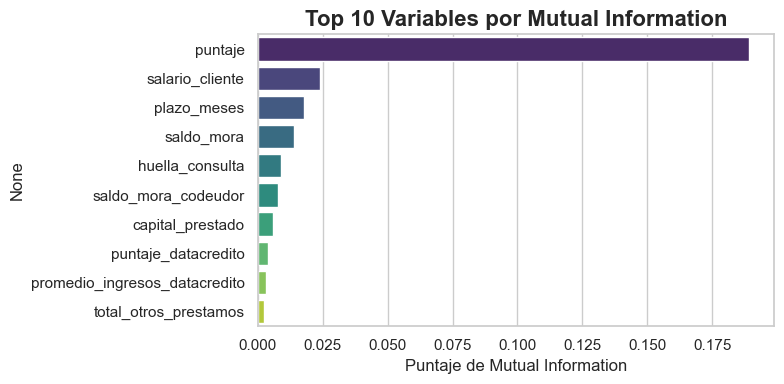

In [55]:
# Mostrar Top 10 Mutual Information

plt.figure(figsize = (8, 4))
sns.barplot(x = mi_scores.values[:10], y = mi_scores.index[:10], hue = mi_scores.index[:10], palette = 'viridis', legend = False)
plt.title('Top 10 Variables por Mutual Information', fontsize = 16, fontweight = 'bold')
plt.xlabel('Puntaje de Mutual Information') 
plt.tight_layout()
plt.show()

# Anotaciones Mutual Information

Mutual Information mide la dependencia entre variables, también mide relaciones no lineales. Un valor de 0 indica que no hay dependencia, mientras que un valor más alto indica una mayor dependencia. Básicamente responde: Si conozco el valor de la variable X, ¿cuánta incertidumbre se reduce sobre la variable Y?

#### *MI: 0.00 – 0.01*: Variable casi inútil, no aporta información relevante
#### *MI:0.01 – 0.05*: Señal débil, algo de relación pero poco poder predictivo
#### *MI: 0.05 – 0.1*: Variable con importancia moderada, aporta información. Es útil
#### *MI: 0.1 – 0.2*: Variable con alta importancia, aporta información significativa y es relevante.
#### *MI: > 0.2*: Variable con importancia muy alta, aporta información crítica

* El puntaje es la variable más importante para predecir el pago a tiempo, con un MI de 0.17, lo que indica que tiene una relación significativa con la variable objetivo.
* La tendencia de ingresos también es relevante, con un MI de 0.05, lo que sugiere que el comportamiento de los ingresos del cliente puede influir en su capacidad para pagar a tiempo.


# Variables que se podrían Eliminar/Transformar

* **fecha_prestamo**: Esta variable no aporta información relevante para el análisis de riesgo crediticio, ya que la fecha del préstamo no tiene una relación directa con la capacidad de pago del cliente. Además, al no tratarse de una serie de tiempo sería dificil sacarle provechp a esta.
* Las variables variables de creditos ( **creditos_sectorFinanciero**, **creditos_sectorCooperativo** o **creditos_sectorReal**) podría ser eliminada, ya que todas ellas están relacioandas. Se podrían agrupar en **cant_creditos_vigentes** o se podría dejar solamente **creditos_sectorFinanciero** que es la que tiene mayor correlación con la variable objetivo.
* **saldo_principal** y **saldo_total**, entre estas se puede eliminar una por su alta correlación entre sí, por lo que resutarían redundantes.
* **DTI** y **apalancamiento** también tienen una correlación de 0.99, por lo que se podría eliminar una de las dos.
* **cuota_pactada** y **capital_prestado** también tienen una correlación alta, por lo que se podría eliminar una de las dos. Aunque al tratarse de datos reales, se podría entrar en consideración.
* **saldo_mora_codeudor** también tiene una correlación muy baja con la variable objetivo, por lo que se podría eliminar, aunque también se podría considerar como una variable de interés para el análisis de riesgo crediticio.
* A la variable **tipo_credito** se le pueden eliminar las categorías 6, 7, 10 y 68 por su baja frecuencia, aunque también se podrían agrupar en una categoría "Otros" para no perder información.
* En cuanto a la variable **plazo_meses**, se puede discretizar en intervalos de tiempo (corto, mediano, largo plazo) para reducir la cantidad de valores únicos y facilitar el análisis.

In [56]:
# Eliminación de variables

variables_a_eliminar = ['fecha_prestamo', 'creditos_sectorCooperativo', 'creditos_sectorReal', 
                        'creditos_sectorFinanciero', 'saldo_principal', 'dti', 'saldo_mora_codeudor']

# Eliminar las variables del DataFrame

#df = df.drop(columns = variables_a_eliminar)

#df.info()

# Anotaciones de Exposiciones de Compañeros.

* Curva de Tasa de Evento --> discretización por intervalos de variables numéricas vs la variable objetivo.

- Clientes jovenes y huella consulta entre 5 y 10 --> tendencia a no pagar

* Perfil del cliente tipo --> mediana/media de las variables (construir arquetipo)